In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
og_dt = pd.read_csv("../02_program_code/high-stress_standard_output_timesteps_final.csv")
new_dt = pd.read_csv("../02_program_code/high-stress_test_output_final.csv")

In [31]:
new_dt = new_dt[new_dt['year'] != 0]
og_dt = og_dt[og_dt['year'] != 0]

In [32]:
new_dt.head()

year  julian-day  standard-time  solar  rain  wind      T-air    T-soil  \
0  2010           1              0    0.0   0.0  3.03 -12.020204 -8.220554   
1  2010           1              1    0.0   0.0  2.88 -11.830204 -8.280554   
2  2010           1              2    0.0   0.0  2.73 -11.430113 -8.340554   
3  2010           1              3    0.0   0.0  2.82 -11.330113 -8.400554   
4  2010           1              4    0.0   0.0  2.90 -11.446826 -8.450554   

       D-MD        P0  ...  end-ground-water  end-E  end-drainage  \
0  0.105436  0.000000  ...                 0    0.0           0.0   
1  0.109861  0.010078  ...                 0    0.0           0.0   
2  0.116197  0.009955  ...                 0    0.0           0.0   
3  0.118036  0.010083  ...                 0    0.0           0.0   
4  0.117627  0.009960  ...                 0    0.0           0.0   

   end-soil-evap  end-ET  end-Anet-la  end-total-water-input  end-PLC-plant  \
0            0.0     0.0     0.000000                    0.0            0.0   
1            0.0     0.0     0.000000                    0.0            0.0   
2            0.0     0.0    -0.151212                    0.0            0.0   
3            0.0     0.0    -0.158846                    0.0            0.0   
4            0.0     0.0    -0.161165                    0.0            0.0   

   end-PLC-xylem  end-runoff  
0            0.0           0  
1            0.0           0  
2            0.0           0  
3            0.0           0  
4            0.0           0  

[5 rows x 67 columns]

In [33]:
og_dt.head()

year  julian day  standard time  solar W m-2  rain mm  Wind m s-1  \
0  2010           1              0          0.0      0.0        3.03   
1  2010           1              1          0.0      0.0        2.88   
2  2010           1              2          0.0      0.0        2.73   
3  2010           1              3          0.0      0.0        2.82   
4  2010           1              4          0.0      0.0        2.90   

     T air C  T soil C  D MD (kPa)    P0 Mpa  ...  vcmax  empty5  empty6  \
0 -12.020204 -8.220554    0.105436  0.000000  ...      0       0       0   
1 -11.830204 -8.280554    0.109861  0.010078  ...      0       0       0   
2 -11.430113 -8.340554    0.116197  0.009955  ...      0       0       0   
3 -11.330113 -8.400554    0.118036  0.010083  ...      0       0       0   
4 -11.446826 -8.450554    0.117627  0.009960  ...      0       0       0   

   empty7  empty8  empty9  empty10  empty11  empty12  empty13  
0       0       0       0        0      NaN      NaN      NaN  
1       0       0       0        0      NaN      NaN      NaN  
2       0       0       0        0      NaN      NaN      NaN  
3       0       0       0        0      NaN      NaN      NaN  
4       0       0       0        0      NaN      NaN      NaN  

[5 rows x 82 columns]

In [34]:
og_dt.columns

Index(['year', 'julian day', 'standard time', 'solar W m-2', 'rain mm',
       'Wind m s-1', 'T air C', 'T soil C', 'D MD (kPa)', 'P0 Mpa', 'P1 MPa',
       'P2 MPa', 'P3 MPa', 'P4 MPa', 'P5 MPa', 'Predawn MPa', 'P Mpa',
       'E mmol m-2s-1', 'Gw mmol m-2s-1', 'Leaf air vpd kPa', 'leaftempt',
       'Anet per leaf area umol', 's-1m-2', 'ci Pa', 'PPFD sun', 'S P Mpa',
       'S E mmol m-2s-1', 'S Gw mmol m-2s-1', 'S Leaf air vpd kPa',
       'S leaftempt', 'Anet umol s-1m-2', 'empty1', 'S ci Pa', 'PPFD shade',
       'E tree', 'Anet Tree per Leaf Area (umol s-1m-2)', 'empty2',
       'pcrit MPa', 'Ecrit', 'Pleaf MPa', 'Pstem MPa', 'Proot MPa',
       'k stem kghr-1m-2', 'kleaf kghr-1m-2', 'kplant kghr-1m-2',
       'kxylem kghr-1m-2', 'kroot 1 kghr-1m-2', 'kroot 2 kghr-1m-2',
       'kroot 3 kghr-1m-2', 'kroot 4 kghr-1m-2', 'kroot 5 kghr-1m-2',
       'kroot all kghr-1m-2', 'Eroot 1 (mmol s-1 m-2 leaf area)',
       'Eroot 2 (mmol s-1 m-2 leaf area)', 'Eroot 3 (mmol s-1 m-2 leaf area)

In [35]:
og_dt = og_dt.drop(['s-1m-2', 'empty1', 'empty2', 'empty3', 'empty4', 'vcmax', 'empty5', 'empty6', 'empty7', 'empty8', 'empty9', 'empty10', 'empty11', 'empty12', 'empty13'], axis=1)

In [36]:
og_dt.columns

Index(['year', 'julian day', 'standard time', 'solar W m-2', 'rain mm',
       'Wind m s-1', 'T air C', 'T soil C', 'D MD (kPa)', 'P0 Mpa', 'P1 MPa',
       'P2 MPa', 'P3 MPa', 'P4 MPa', 'P5 MPa', 'Predawn MPa', 'P Mpa',
       'E mmol m-2s-1', 'Gw mmol m-2s-1', 'Leaf air vpd kPa', 'leaftempt',
       'Anet per leaf area umol', 'ci Pa', 'PPFD sun', 'S P Mpa',
       'S E mmol m-2s-1', 'S Gw mmol m-2s-1', 'S Leaf air vpd kPa',
       'S leaftempt', 'Anet umol s-1m-2', 'S ci Pa', 'PPFD shade', 'E tree',
       'Anet Tree per Leaf Area (umol s-1m-2)', 'pcrit MPa', 'Ecrit',
       'Pleaf MPa', 'Pstem MPa', 'Proot MPa', 'k stem kghr-1m-2',
       'kleaf kghr-1m-2', 'kplant kghr-1m-2', 'kxylem kghr-1m-2',
       'kroot 1 kghr-1m-2', 'kroot 2 kghr-1m-2', 'kroot 3 kghr-1m-2',
       'kroot 4 kghr-1m-2', 'kroot 5 kghr-1m-2', 'kroot all kghr-1m-2',
       'Eroot 1 (mmol s-1 m-2 leaf area)', 'Eroot 2 (mmol s-1 m-2 leaf area)',
       'Eroot 3 (mmol s-1 m-2 leaf area)', 'Eroot 4 (mmol s-1 m-2 leaf

In [37]:
new_dt.columns

Index(['year', 'julian-day', 'standard-time', 'solar', 'rain', 'wind', 'T-air',
       'T-soil', 'D-MD', 'P0', 'P1', 'P2', 'P3', 'P4', 'P5', 'P-PD', 'P-MD',
       'E-MD', 'GW', 'leaf-air-vpd', 'leaftemp', 'Anet-la', 'ci', 'PPFD',
       'S-P-MD', 'S-E-MD', 'S-GW', 'S-leaf-air-vpd', 'S-leaftempt',
       'S-Anet-la', 'S-ci', 'S-PPFD', 'S-E-tree', 'Anet-tree', 'Pcrit',
       'Ecrit', 'P-leaf', 'P-stem', 'P-root', 'K-stem', 'K-leaf', 'K-plant',
       'K-xylem', 'K-root-1', 'K-root-2', 'K-root-3', 'K-root-4', 'K-root-5',
       'K-root-all', 'E-root-1', 'E-root-2', 'E-root-3', 'E-root-4',
       'E-root-5', 'water-content', 'water-content-delta', 'end-rain',
       'end-ground-water', 'end-E', 'end-drainage', 'end-soil-evap', 'end-ET',
       'end-Anet-la', 'end-total-water-input', 'end-PLC-plant',
       'end-PLC-xylem', 'end-runoff'],
      dtype='object')

In [38]:
og_dt = og_dt[(og_dt != 0).any(axis=1)]
new_dt = new_dt[(new_dt != 0).any(axis=1)]
assert len(og_dt) == len(new_dt), "The number of rows in og_dt and new_dt are not the same"

In [39]:
def cmp_across_index_multivar(old_vars, new_vars, log=False, ylim=None, xlim=None):
    plt.figure(figsize=(10, 6))
    for var in old_vars:
        plt.plot(og_dt[var] if not log else np.log1p(og_dt[var]), label=f'og_dt {var}', alpha=0.5)
    for var in new_vars:
        plt.plot(new_dt[var] if not log else np.log1p(new_dt[var]), label=f'new_dt {var}', alpha=0.5)
    plt.xlabel('Index')
    if ylim:
        plt.ylim(ylim)
    if xlim:
        plt.xlim(xlim)
    plt.legend()
    plt.show()

In [40]:
def cmp_across_index(og_var_name, new_var_name, log=False, ylim=None, xlim=None):
    plt.figure(figsize=(10, 6))
    plt.plot(og_dt[og_var_name] if not log else np.log1p(og_dt[og_var_name]), label=f'og_dt {og_var_name}', alpha=0.5, color="r")
    plt.plot(new_dt[new_var_name] if not log else np.log1p(new_dt[new_var_name]), label=f'new_dt {new_var_name}', alpha=0.5, color="b")
    plt.xlabel('Index')
    log_str = "log "
    plt.ylabel(f'{log_str if log else ""}{og_var_name}')
    plt.title(f'Comparison of {new_var_name} between og_dt and new_dt')
    if ylim:
        plt.ylim(ylim)
    if xlim:
        plt.xlim(xlim)
    plt.legend()
    plt.show()

In [41]:
def cmp_with_scatter(og_var_name, new_var_name, log=False):
    plt.figure(figsize=(10, 6))
    plt.scatter(og_dt[og_var_name] if not log else np.log1p(og_dt[og_var_name]), new_dt[new_var_name] if not log else np.log1p(new_dt[new_var_name]))
    x_label = f'log {og_var_name}' if log else f'{og_var_name}'
    y_label = f'log {new_var_name}' if log else f'{new_var_name}'
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'{"log " if log else ""} Comparison of {og_var_name} and {new_var_name}')
    plt.show()

solar W m-2


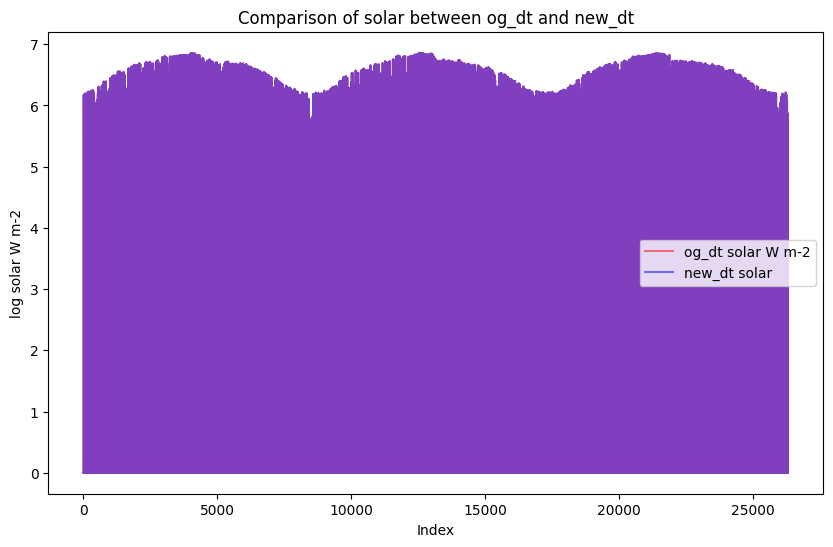

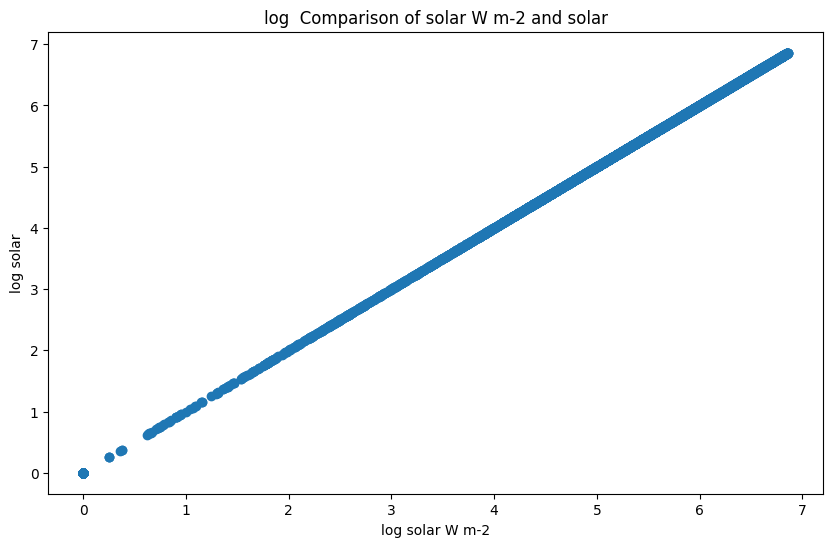

rain mm


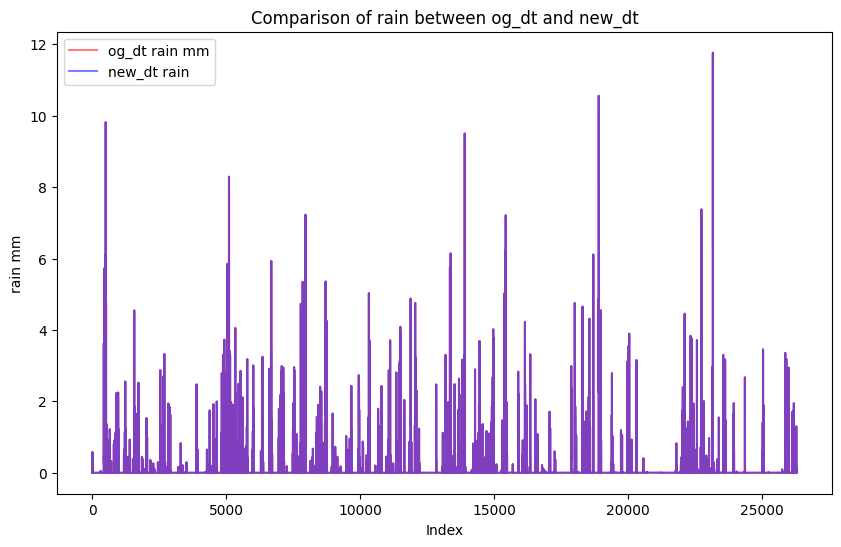

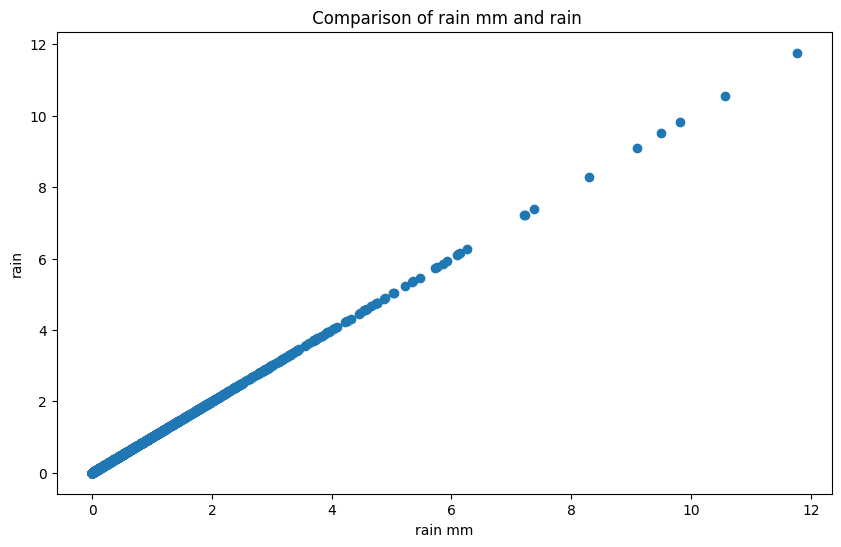

Wind m s-1


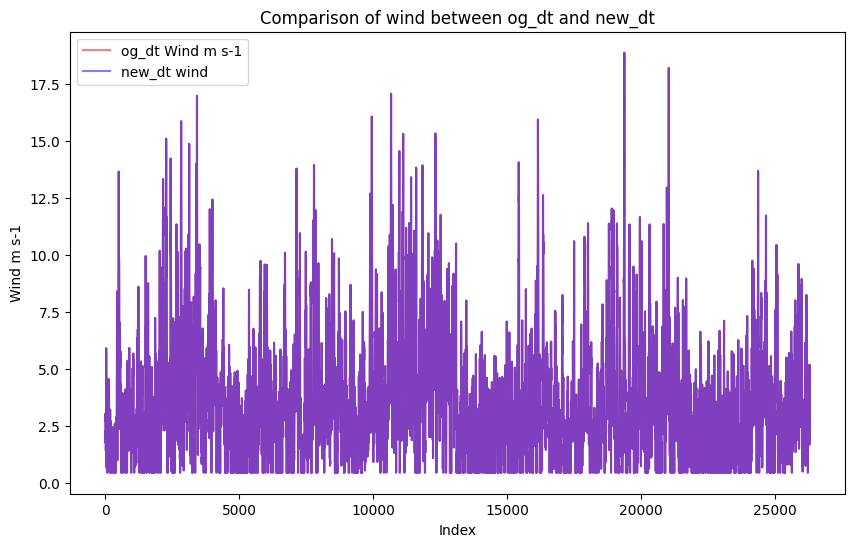

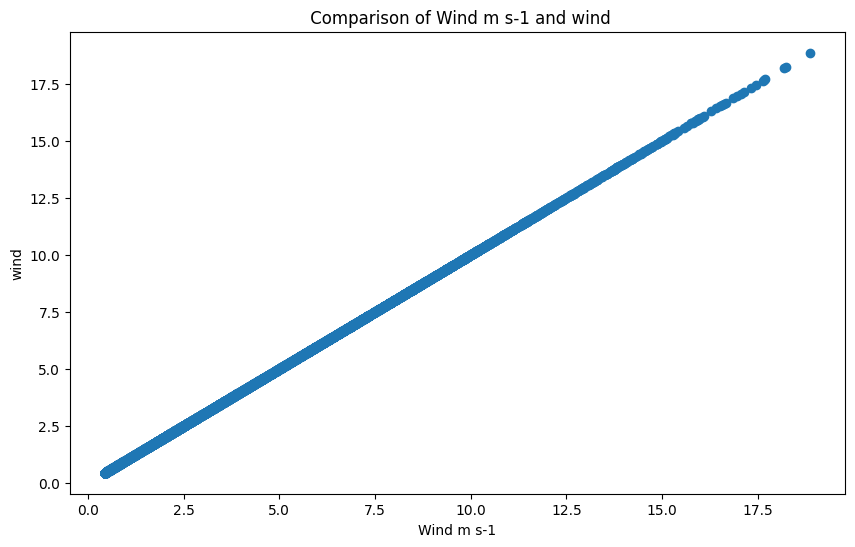

T air C


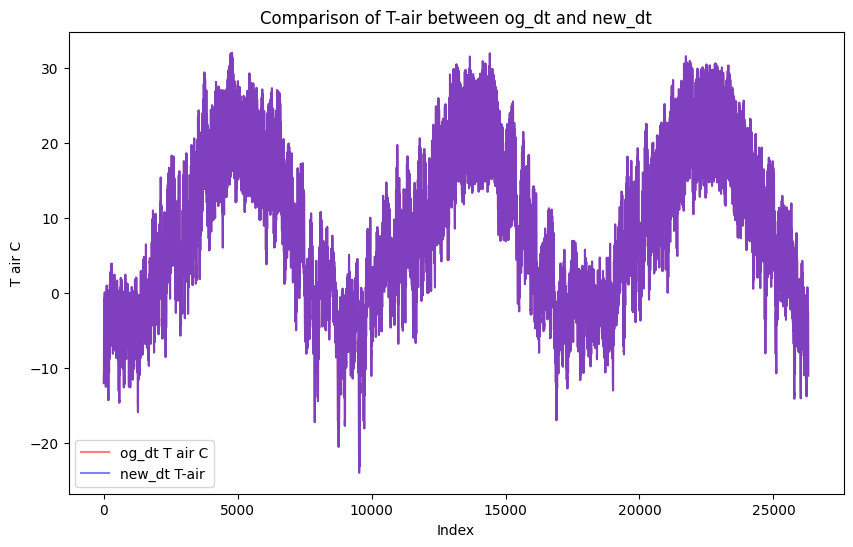

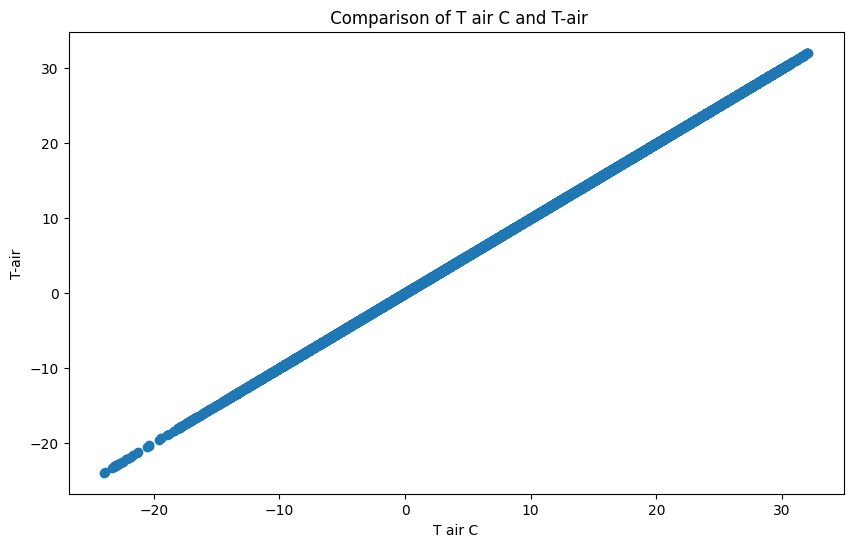

T soil C


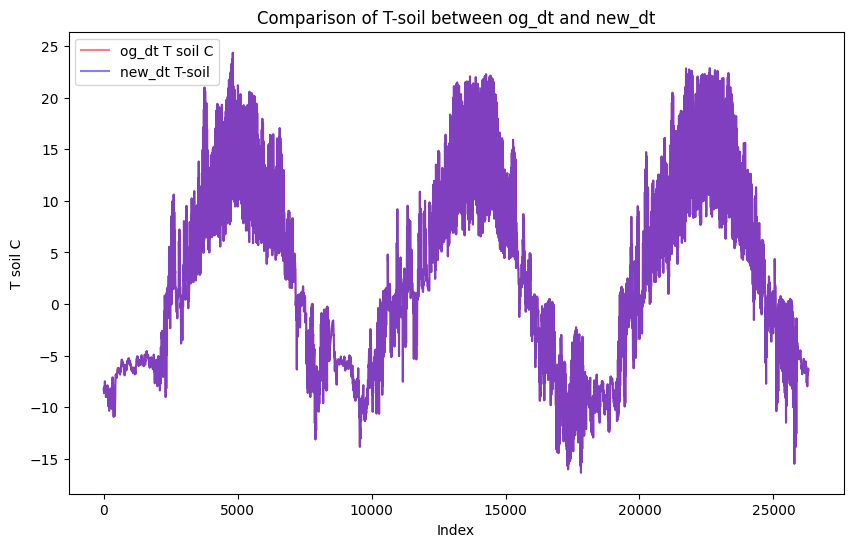

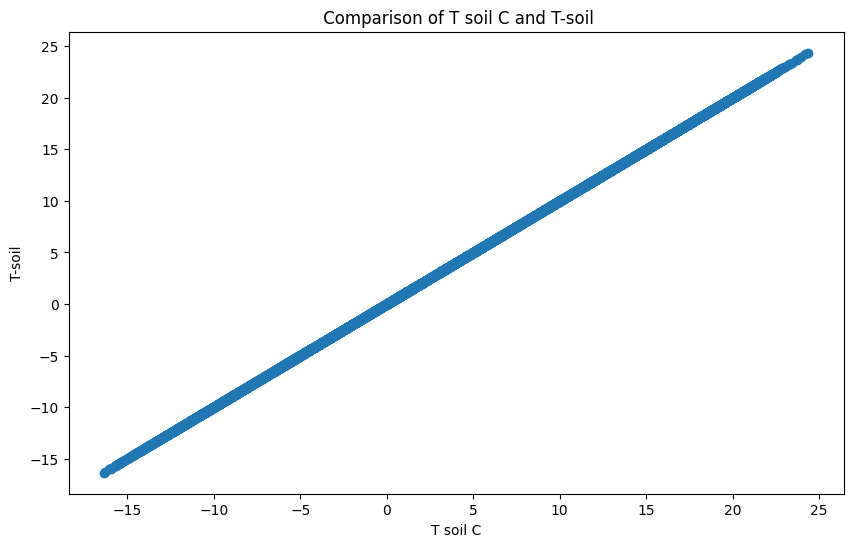

D MD (kPa)


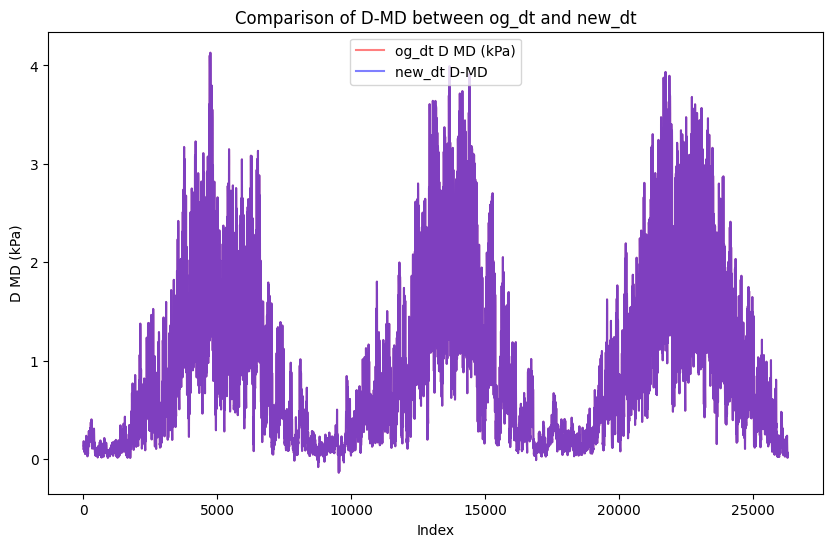

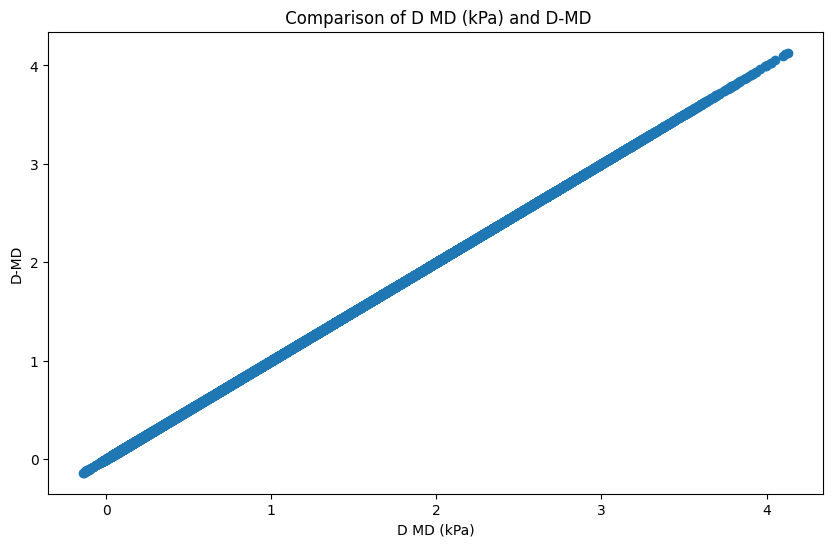

P0 Mpa


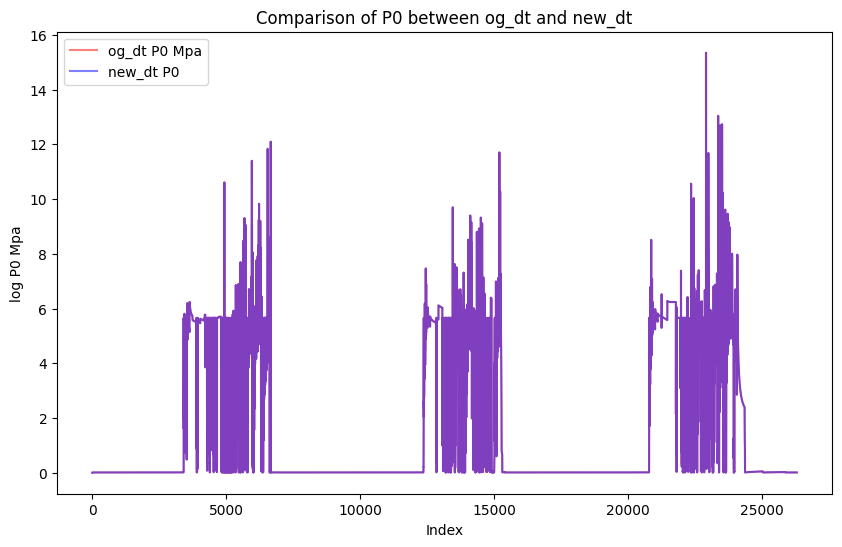

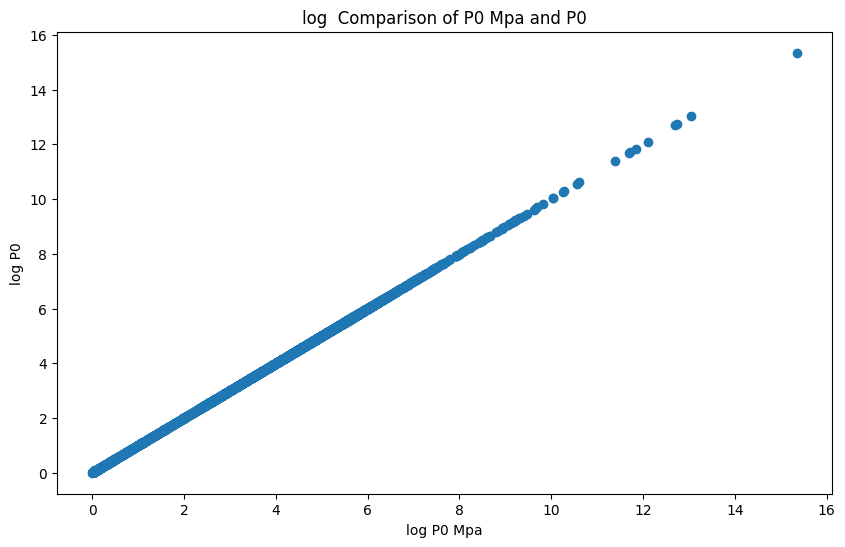

P1 MPa


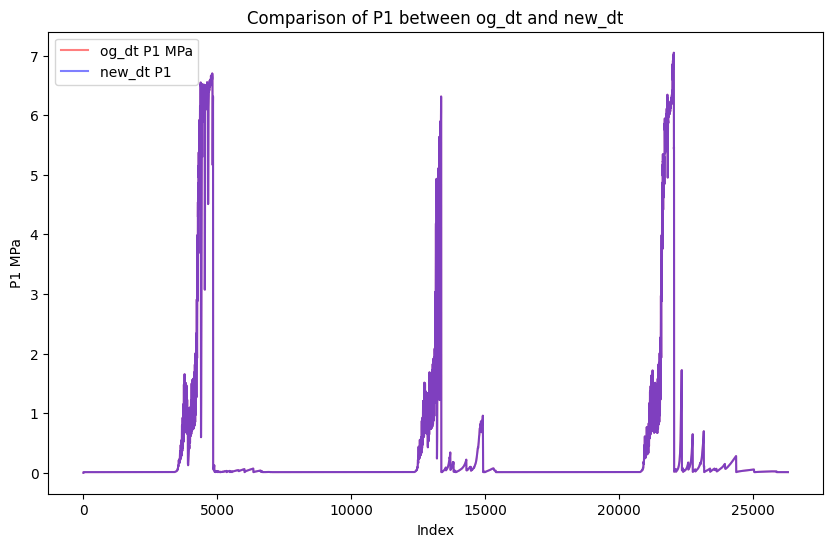

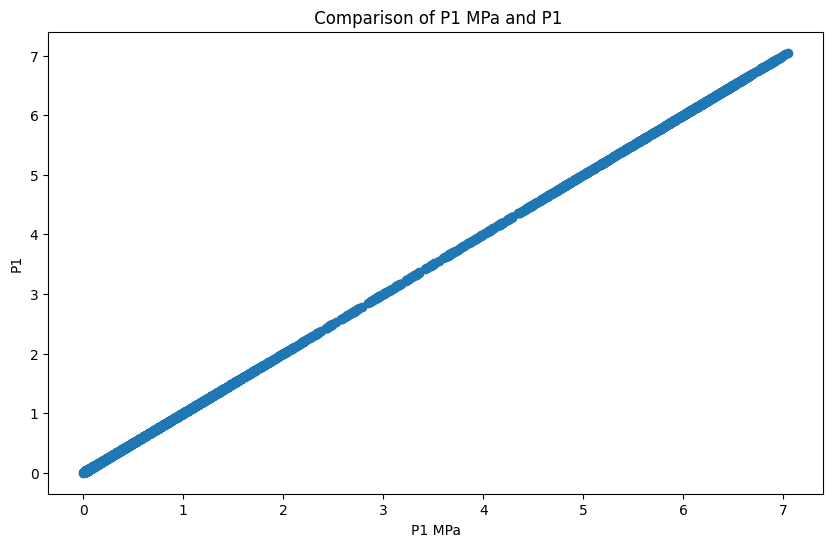

P2 MPa


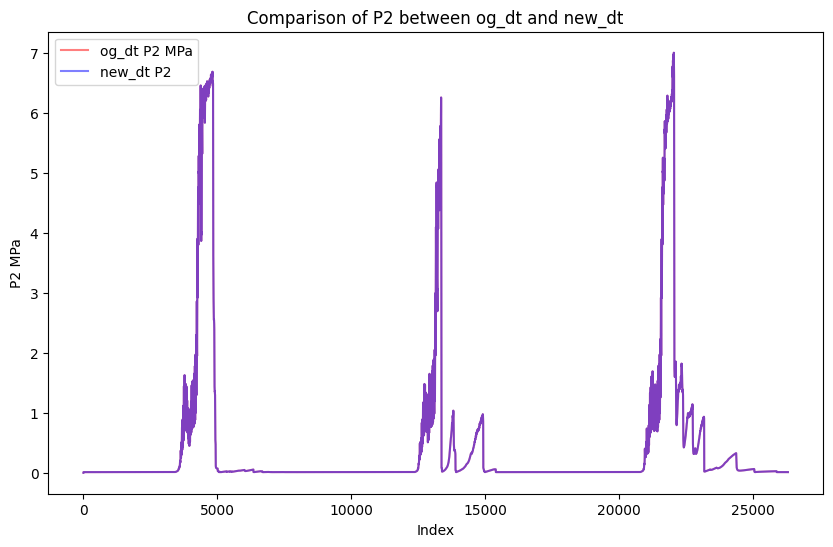

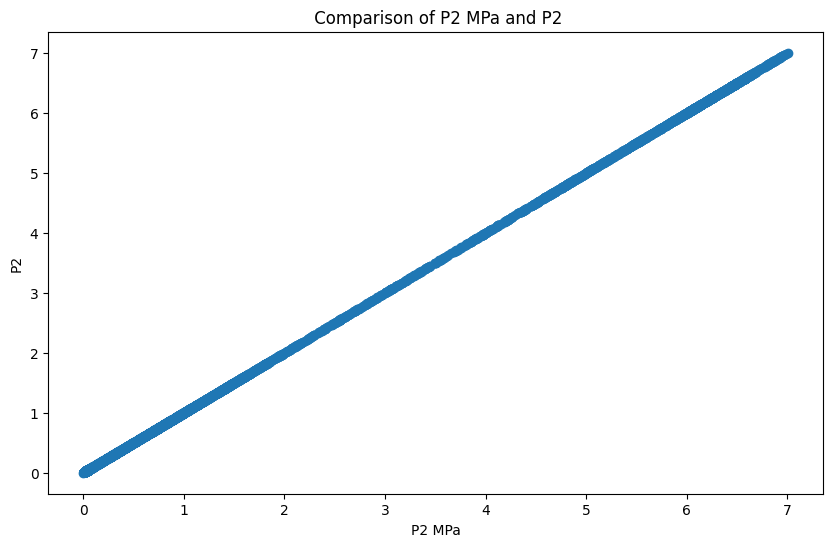

P3 MPa


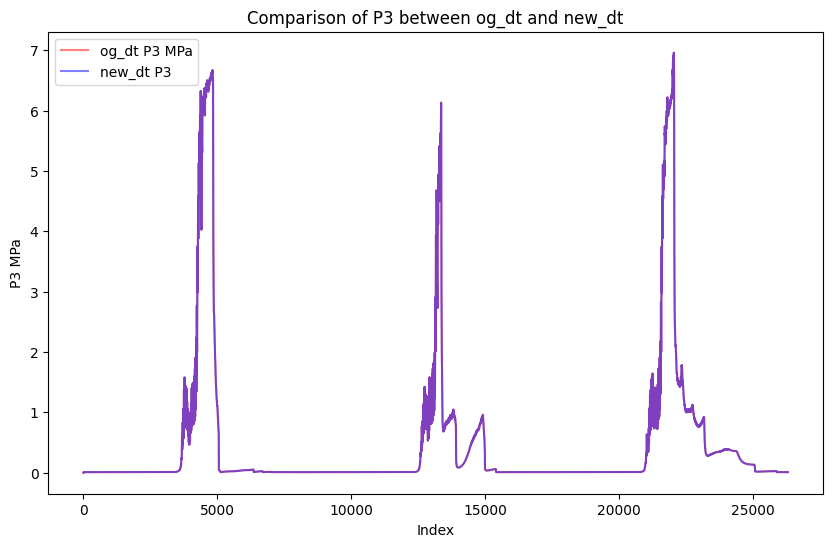

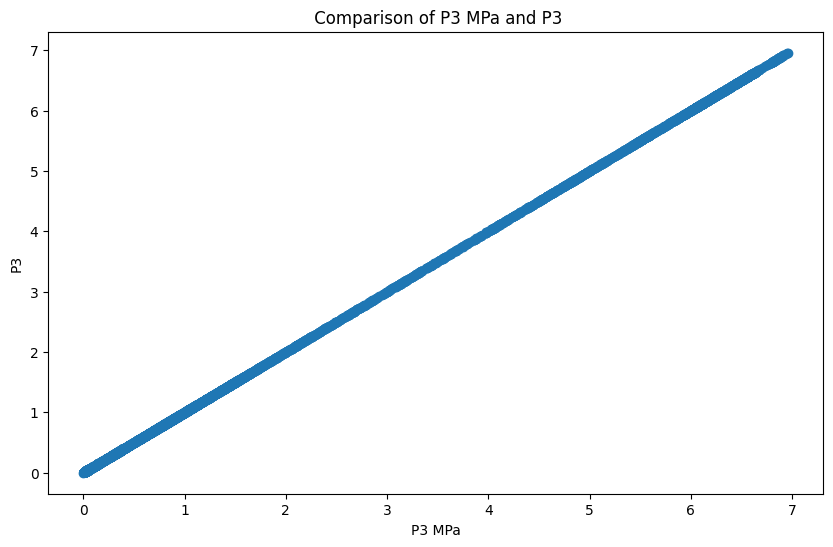

P4 MPa


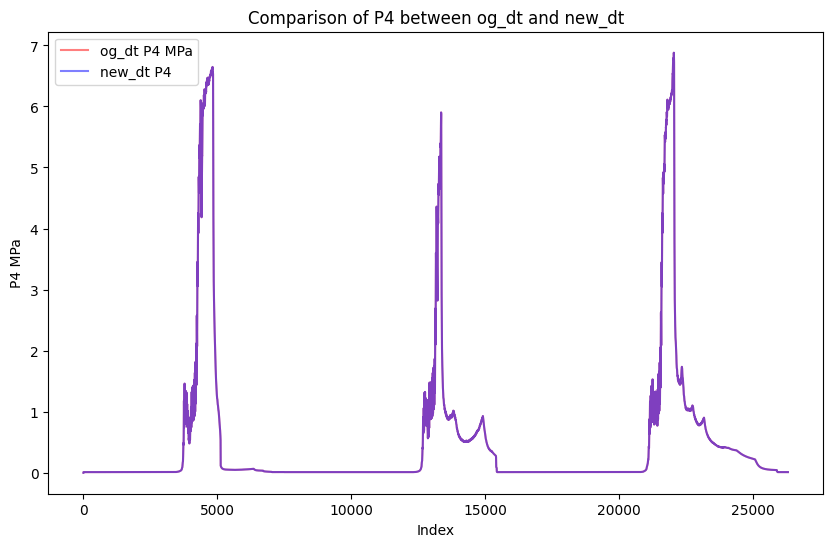

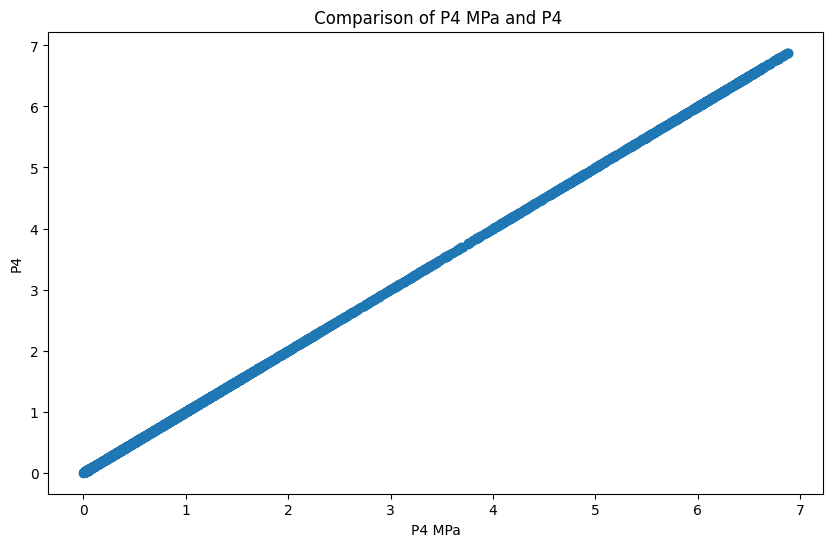

P5 MPa


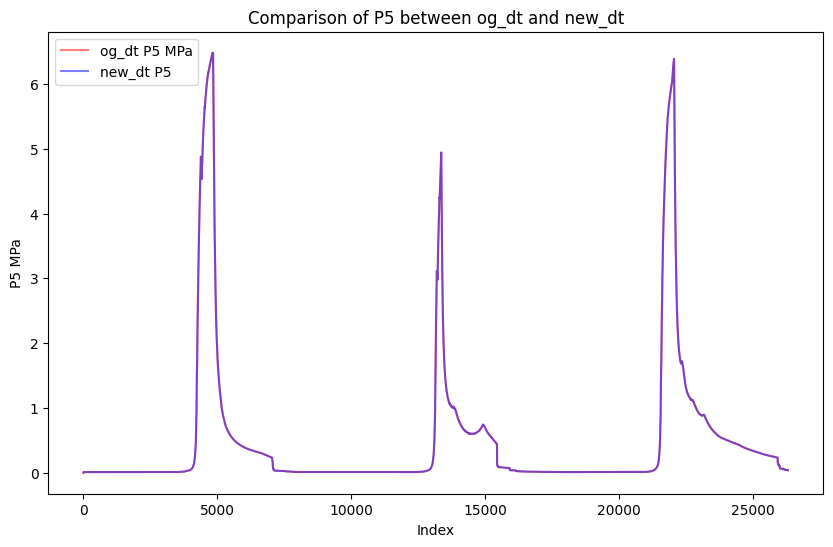

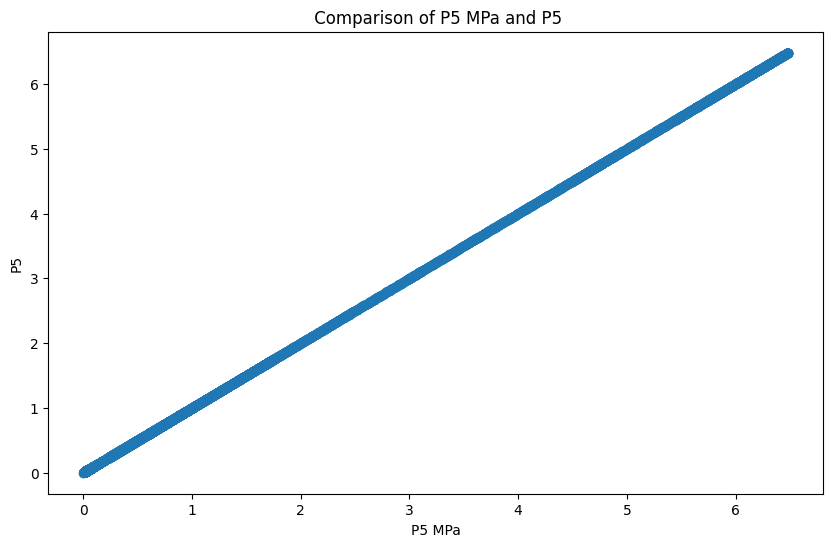

Predawn MPa


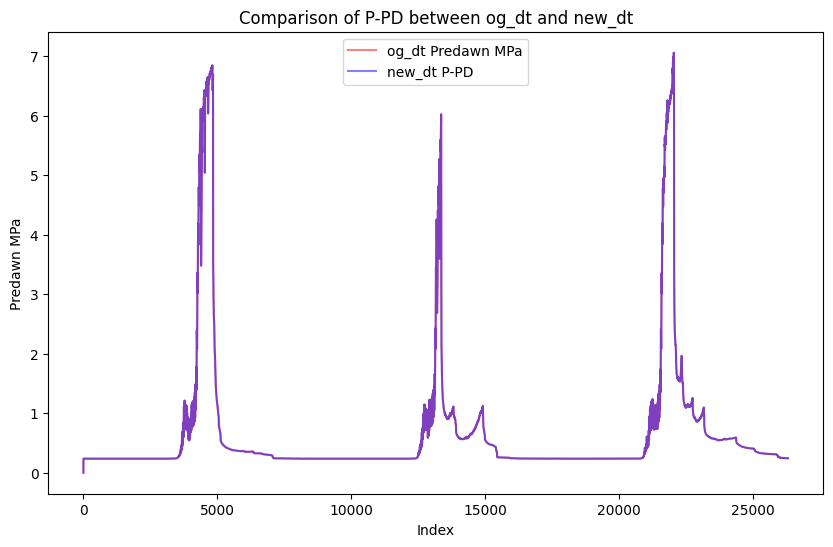

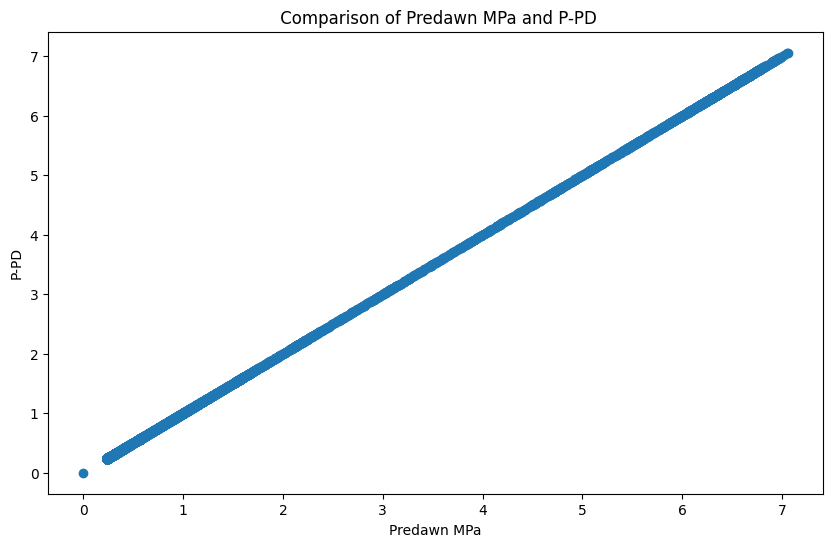

P Mpa


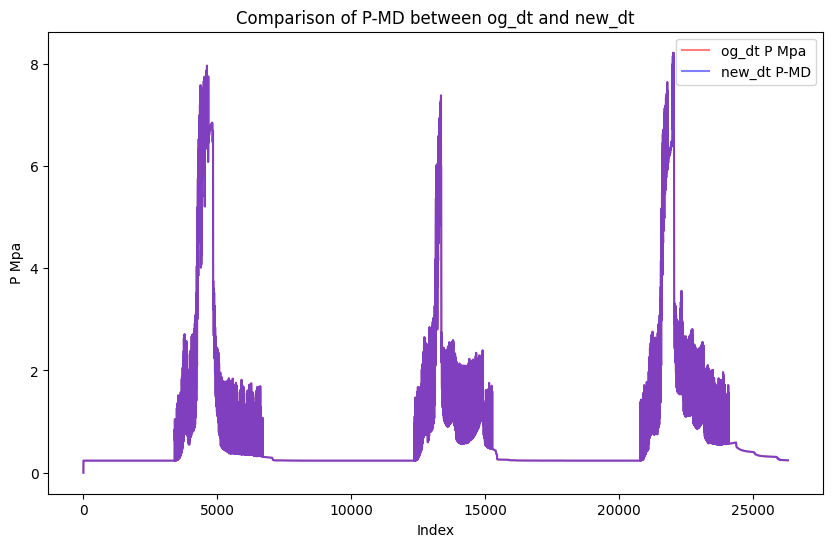

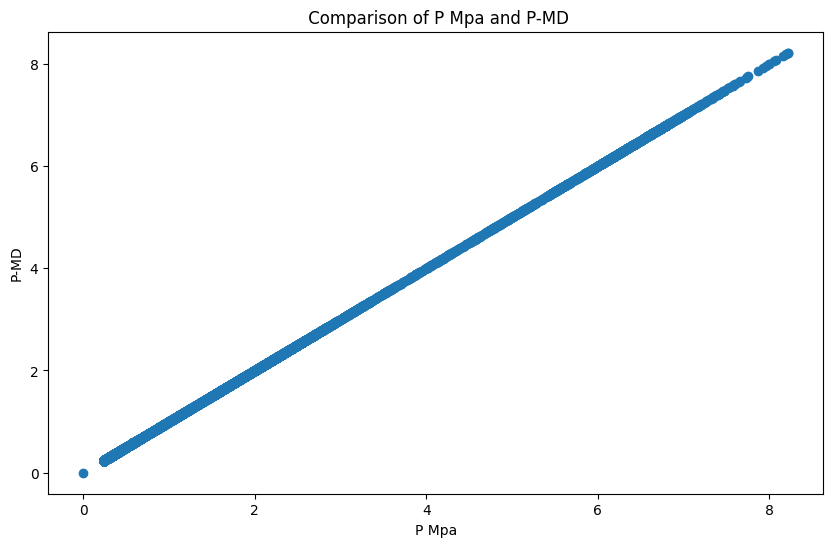

E mmol m-2s-1


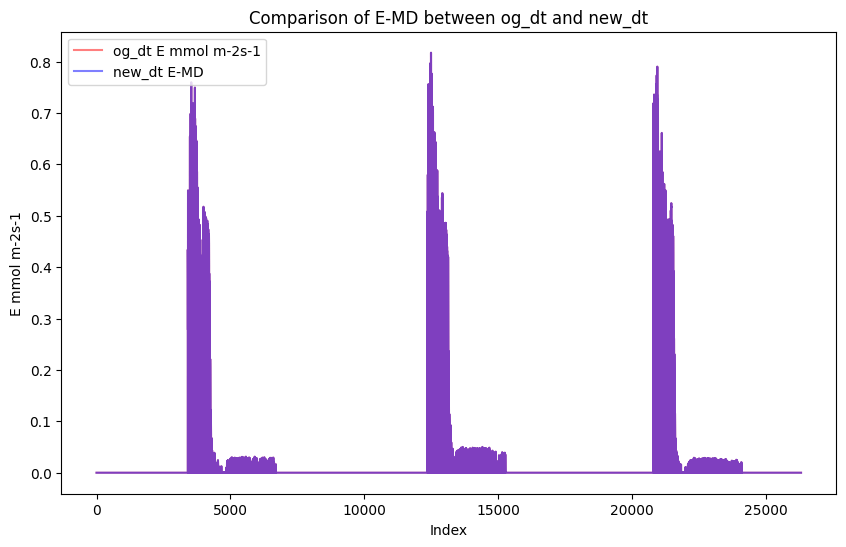

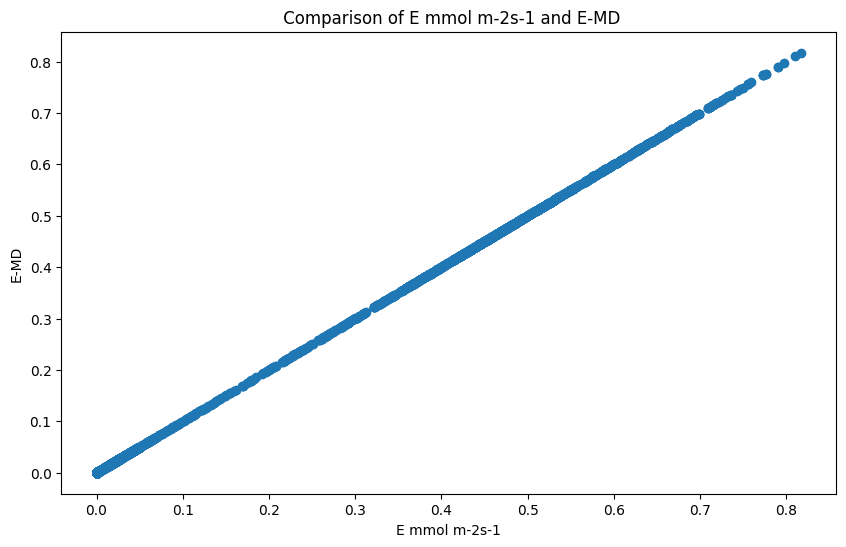

Gw mmol m-2s-1


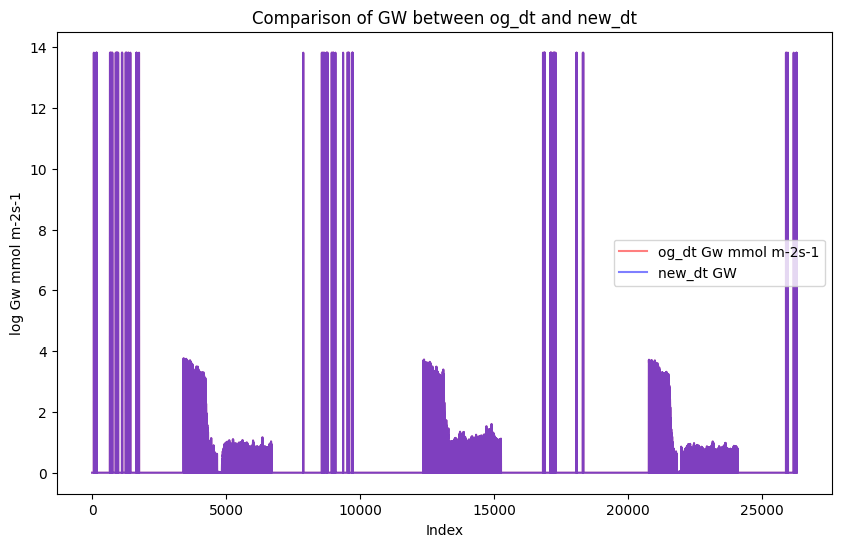

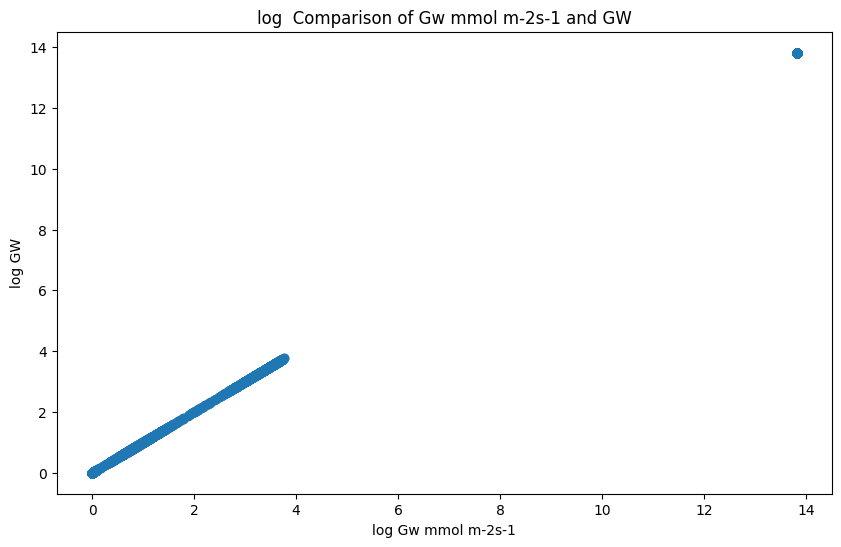

Leaf air vpd kPa


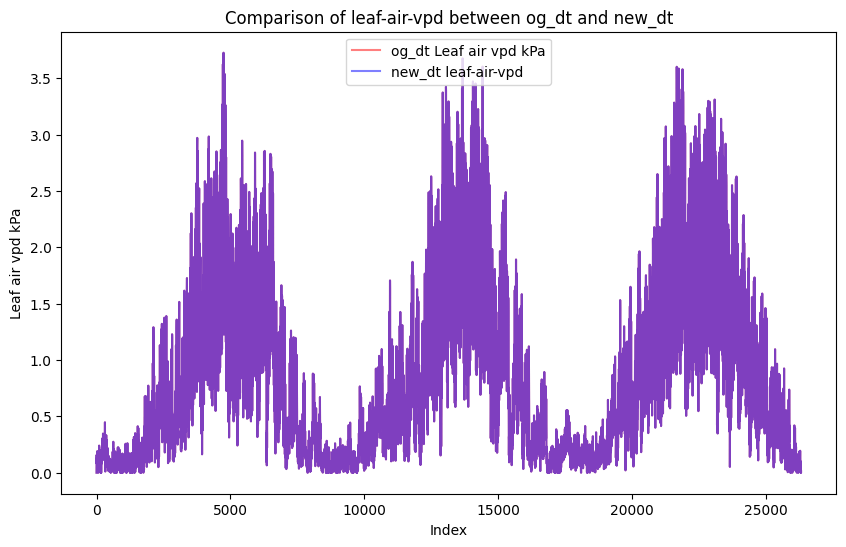

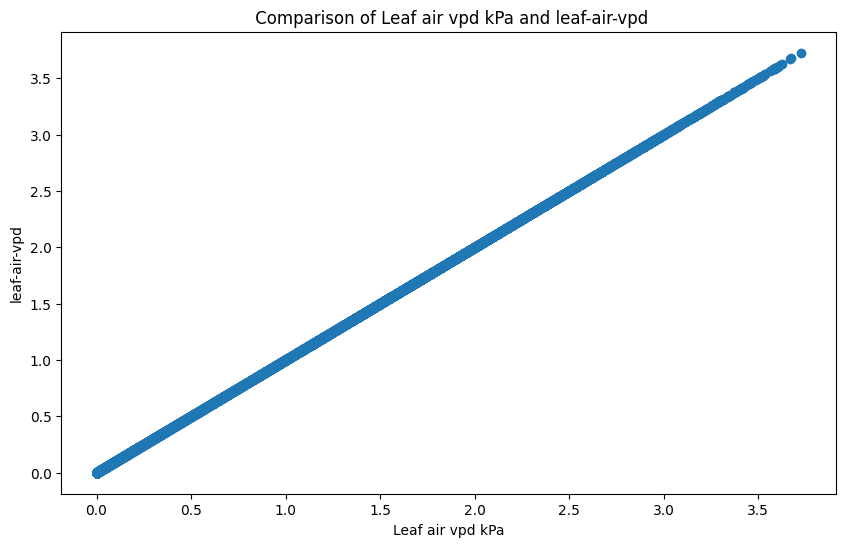

leaftempt


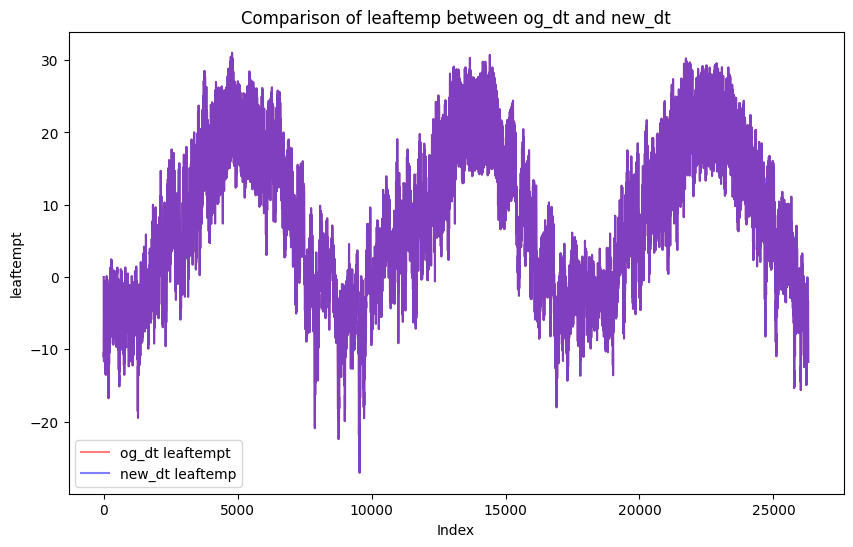

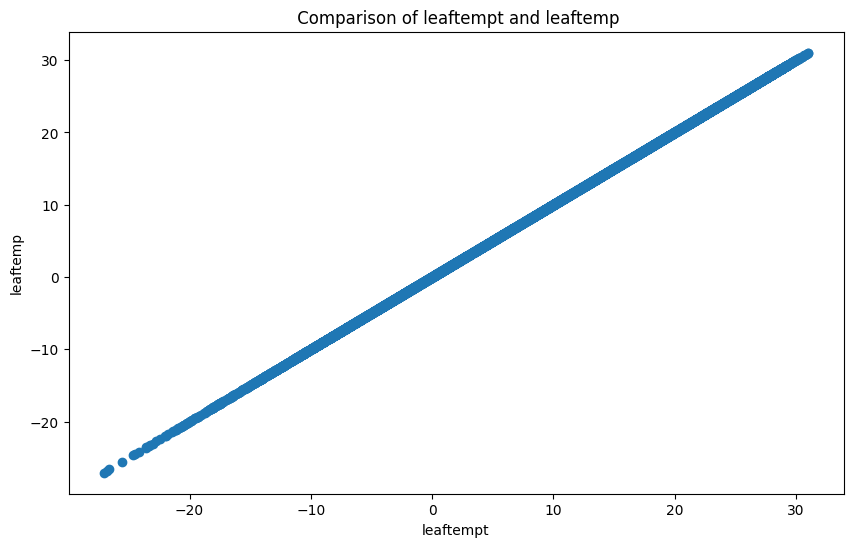

Anet per leaf area umol


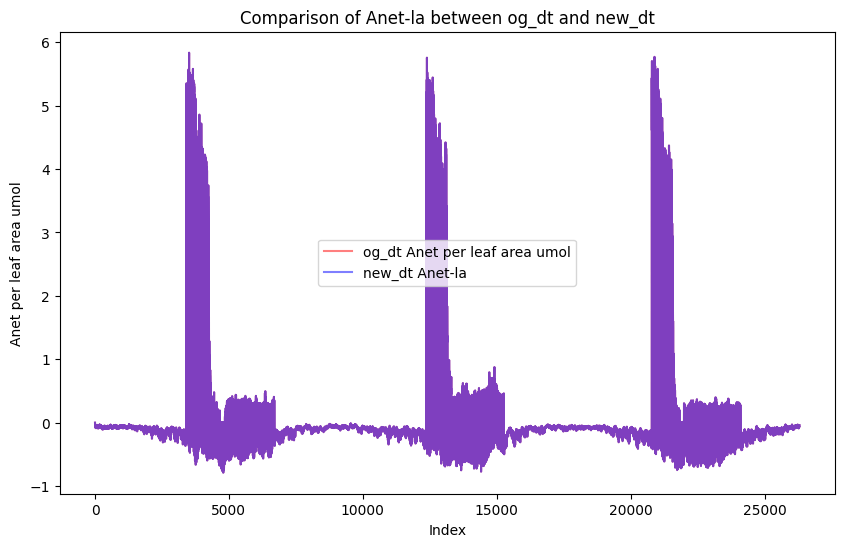

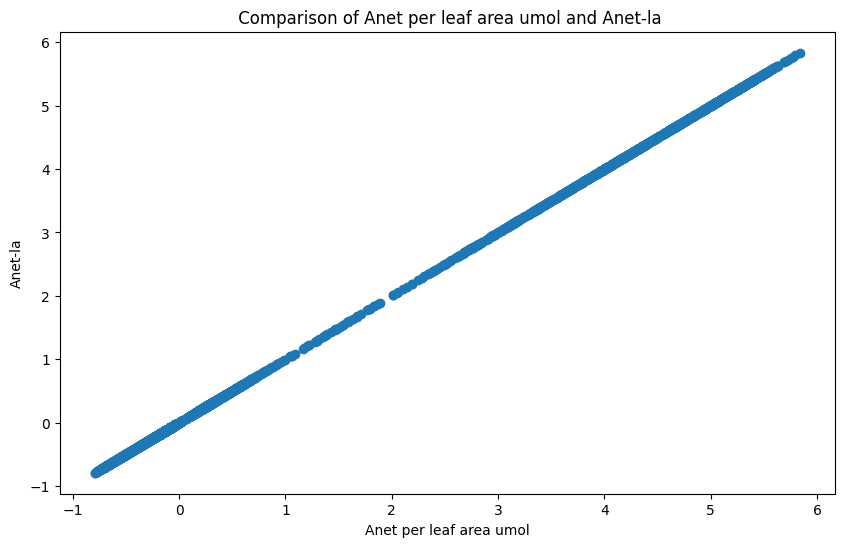

ci Pa


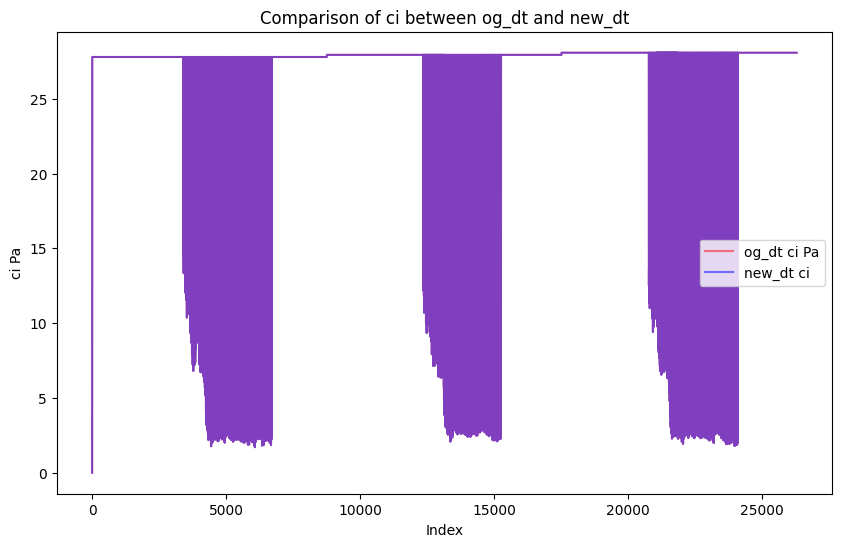

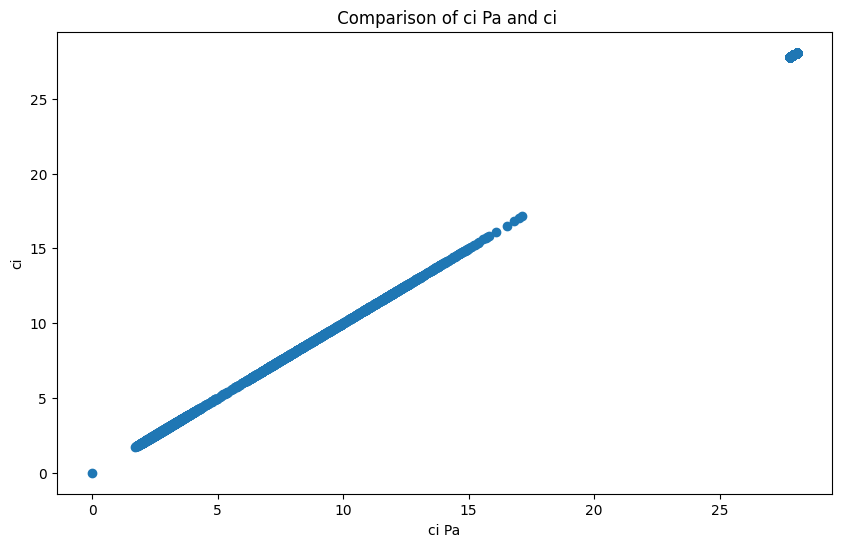

PPFD sun


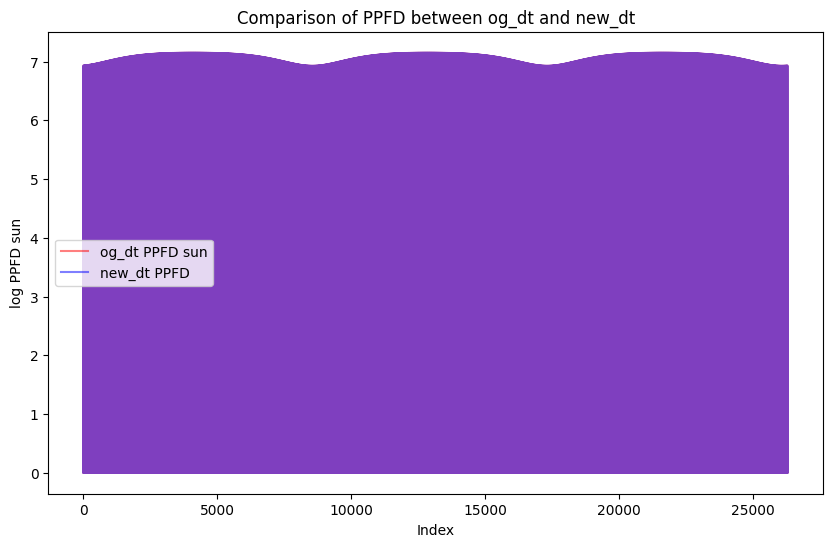

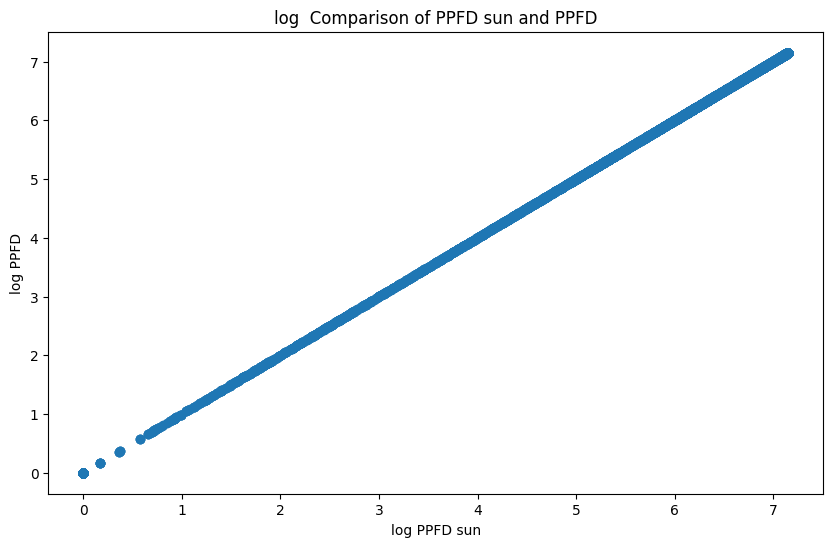

S P Mpa


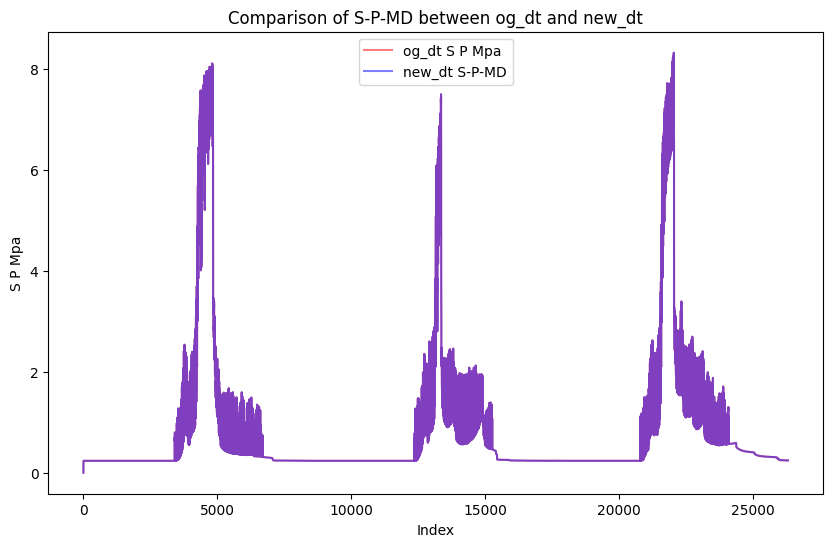

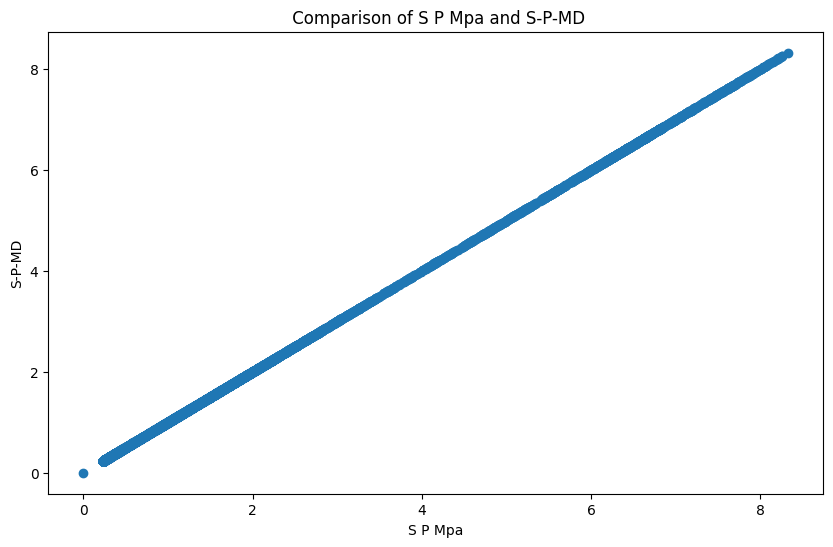

S E mmol m-2s-1


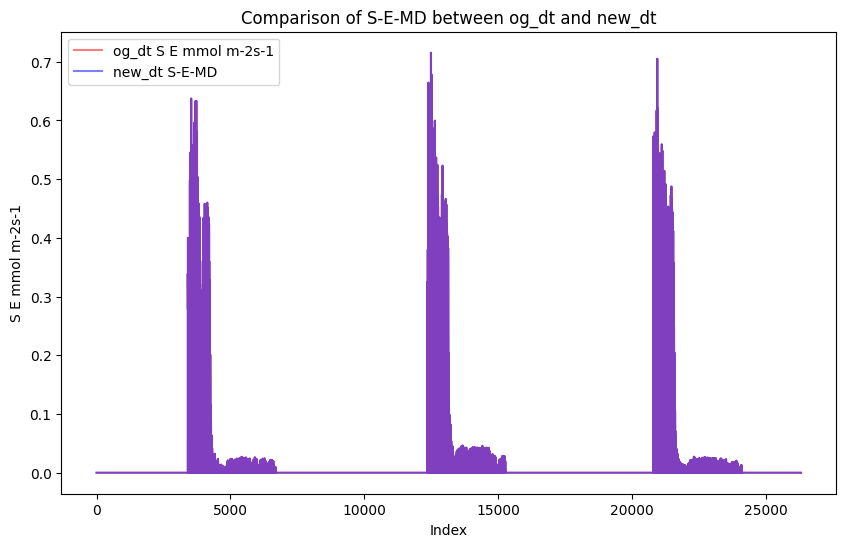

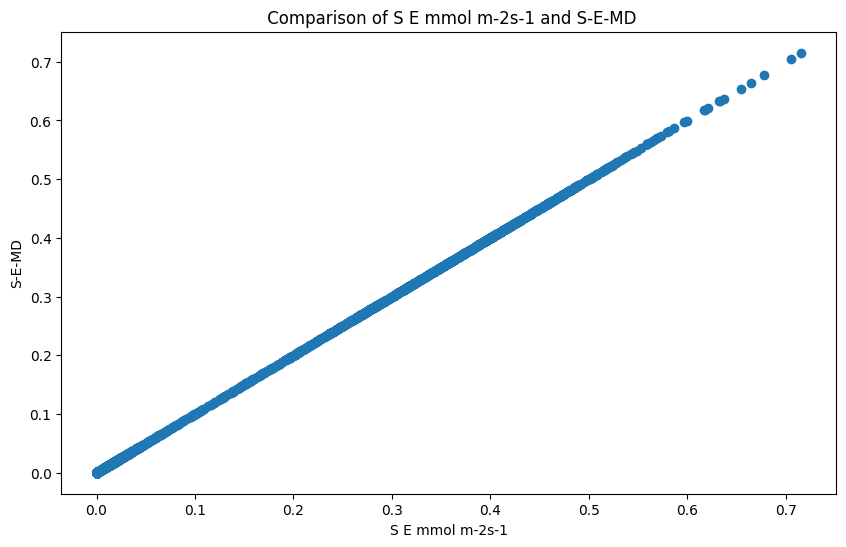

S Gw mmol m-2s-1


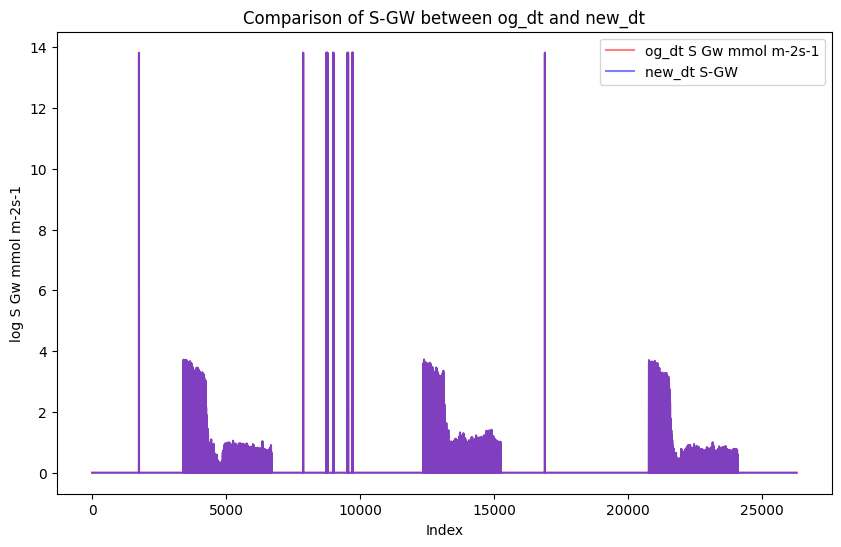

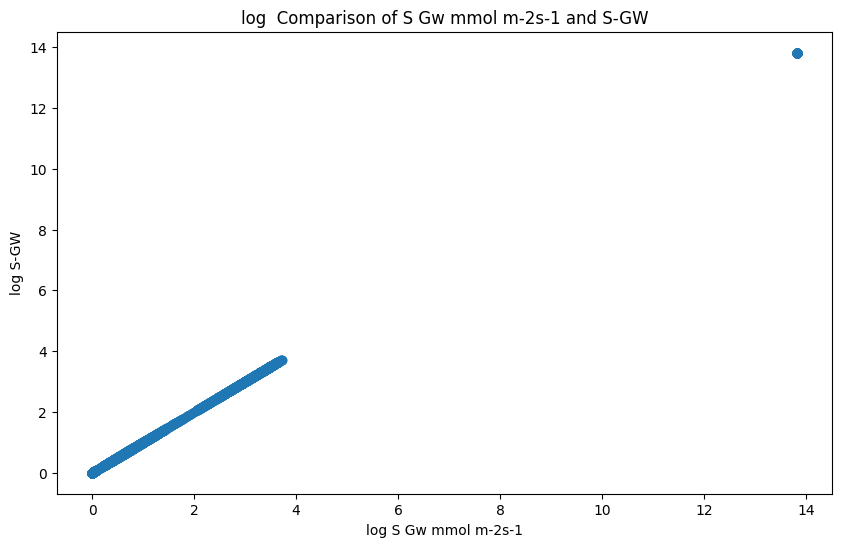

S Leaf air vpd kPa


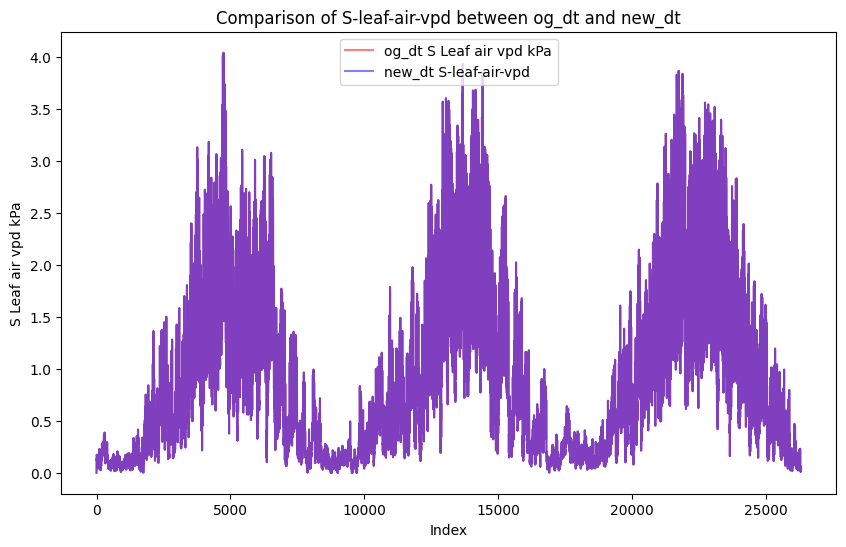

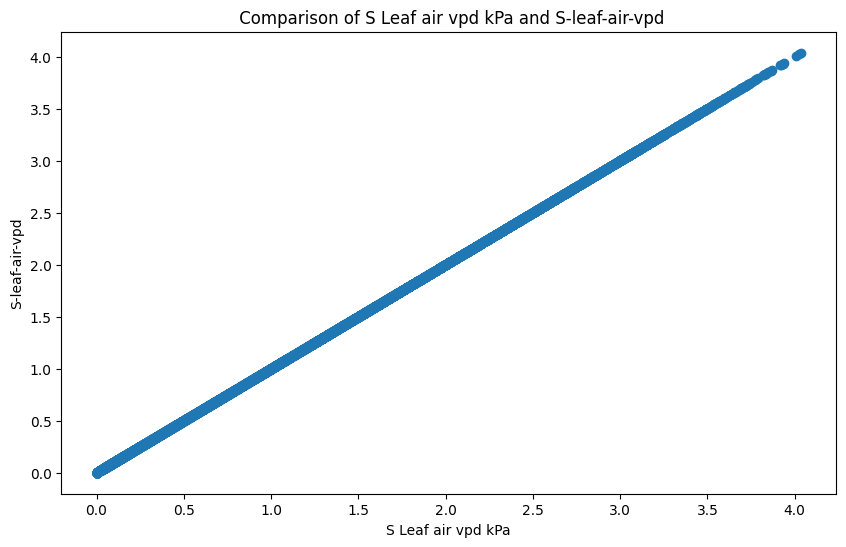

S leaftempt


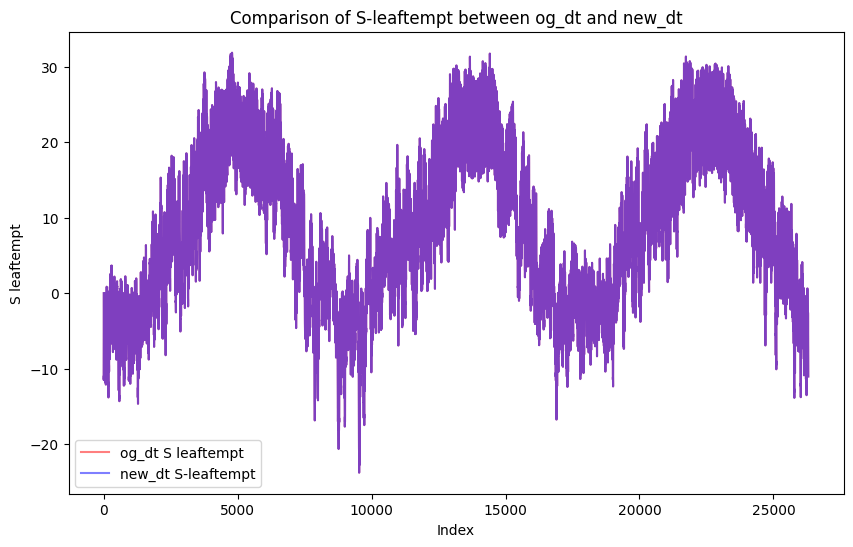

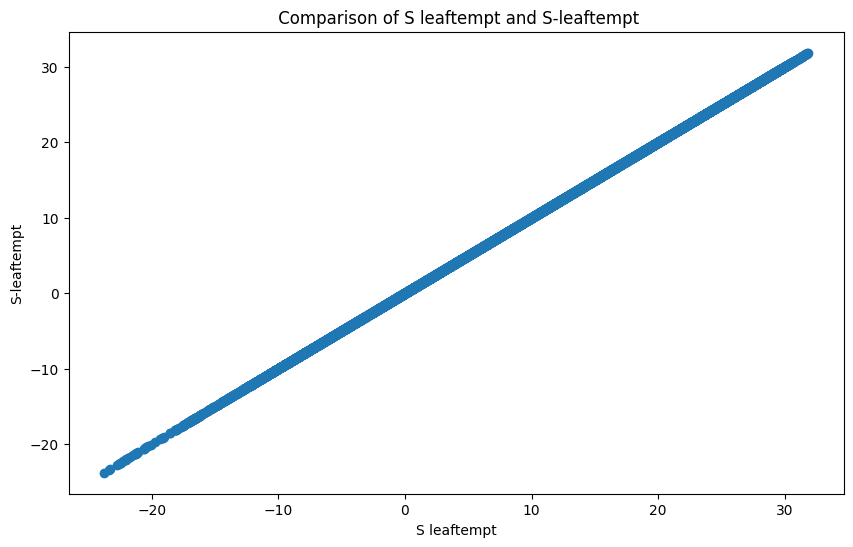

Anet umol s-1m-2


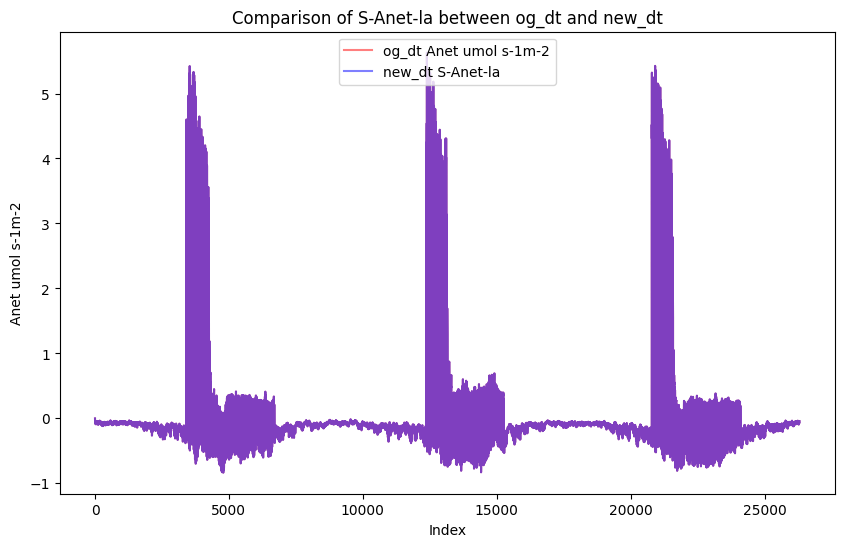

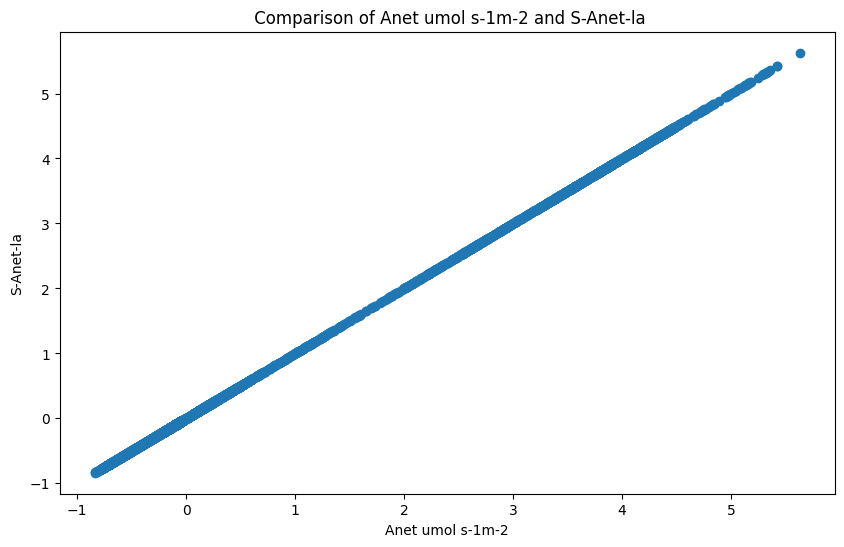

S ci Pa


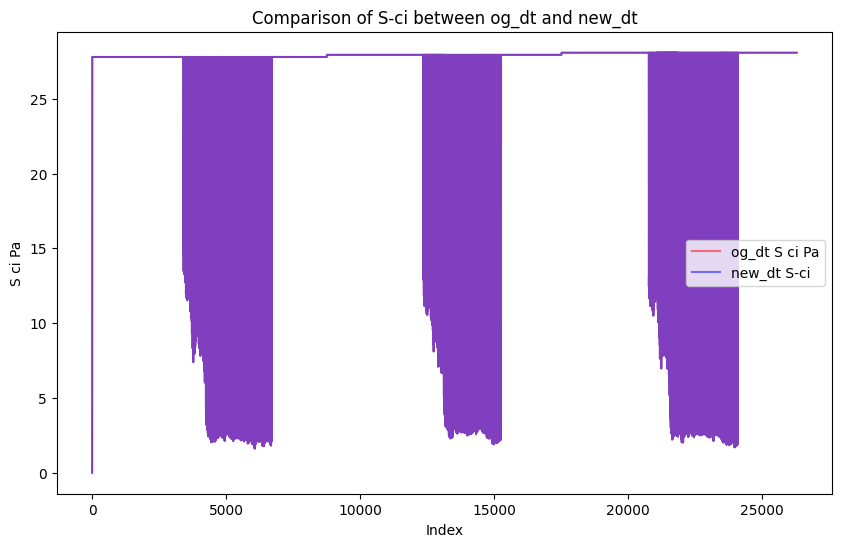

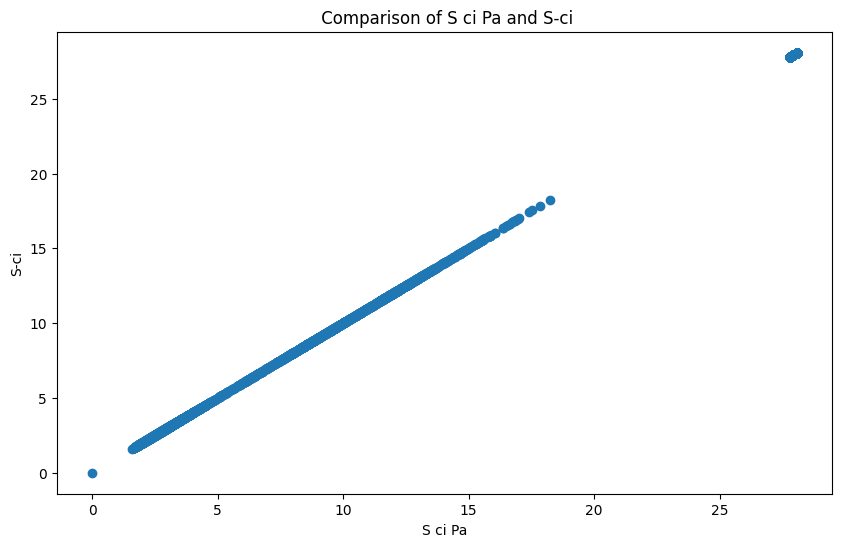

PPFD shade


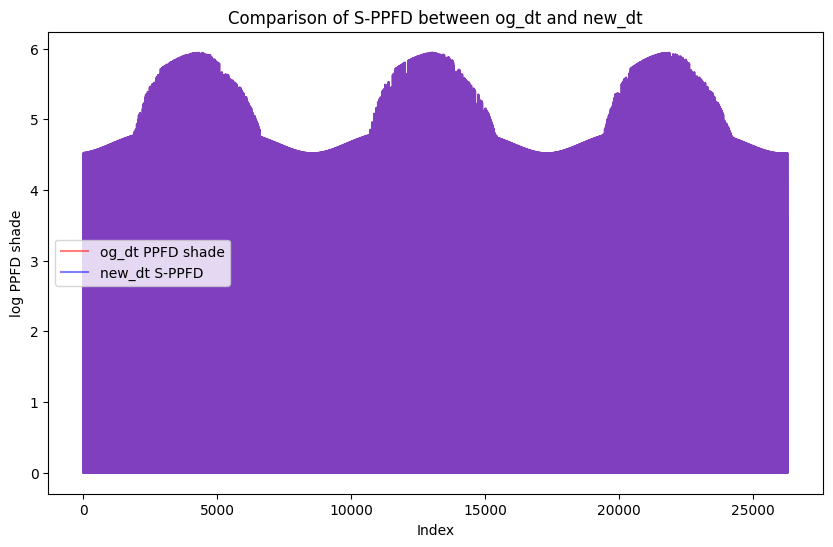

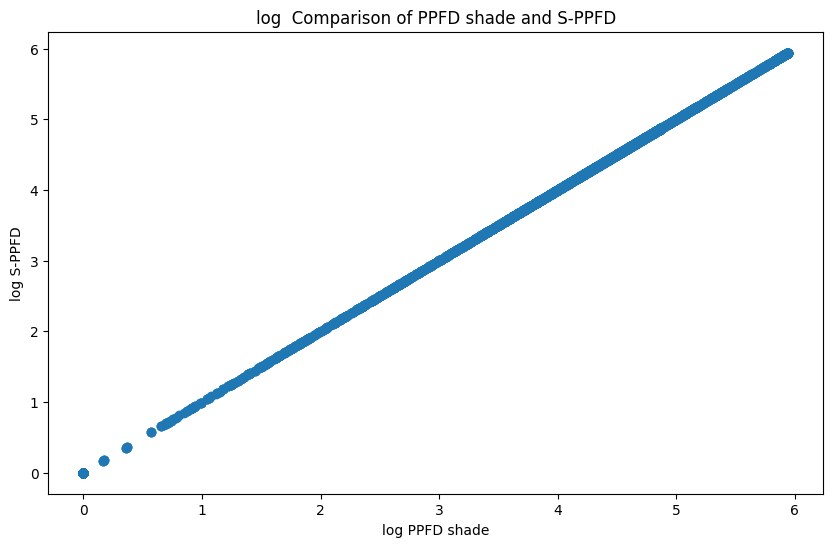

E tree


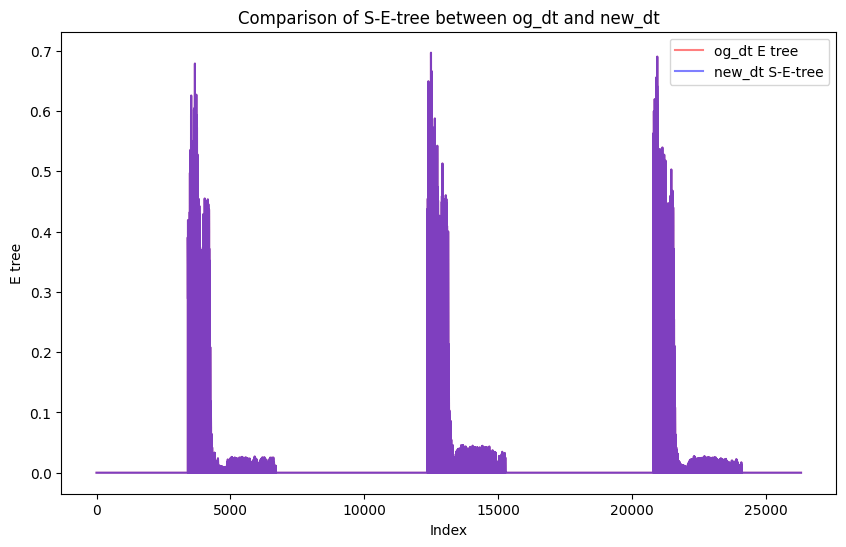

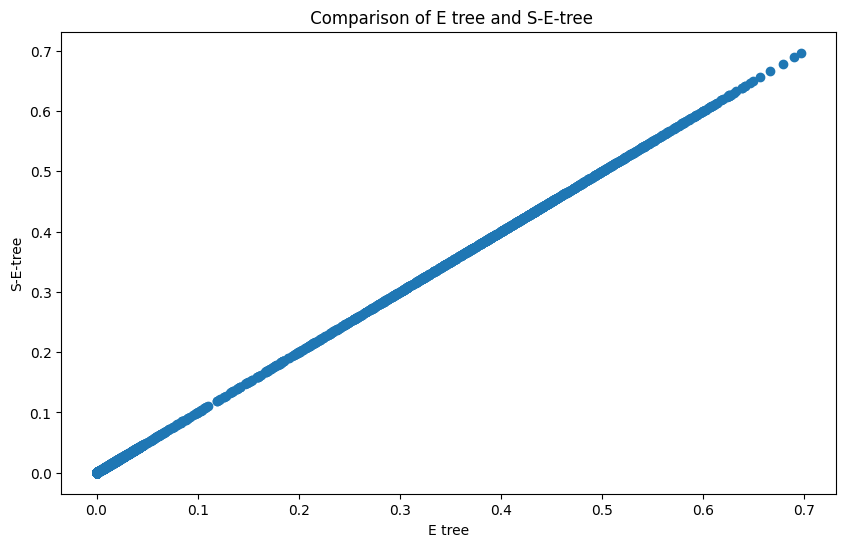

Anet Tree per Leaf Area (umol s-1m-2)


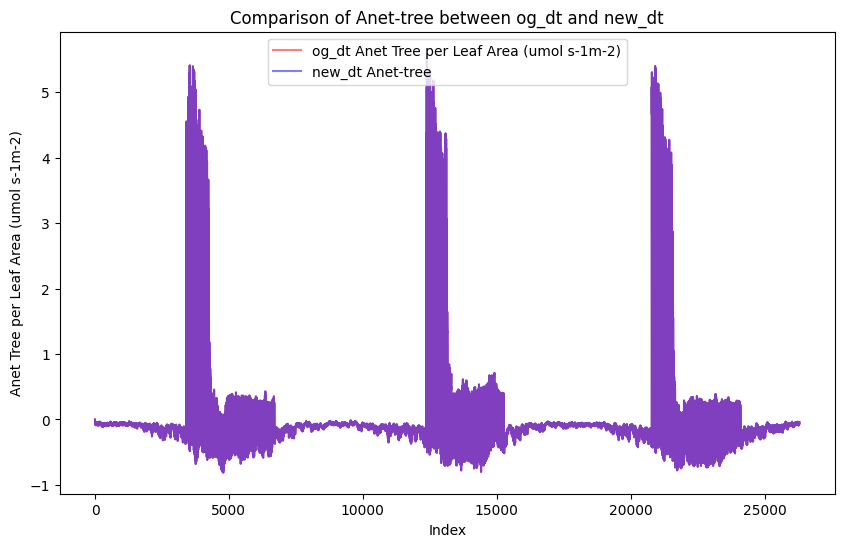

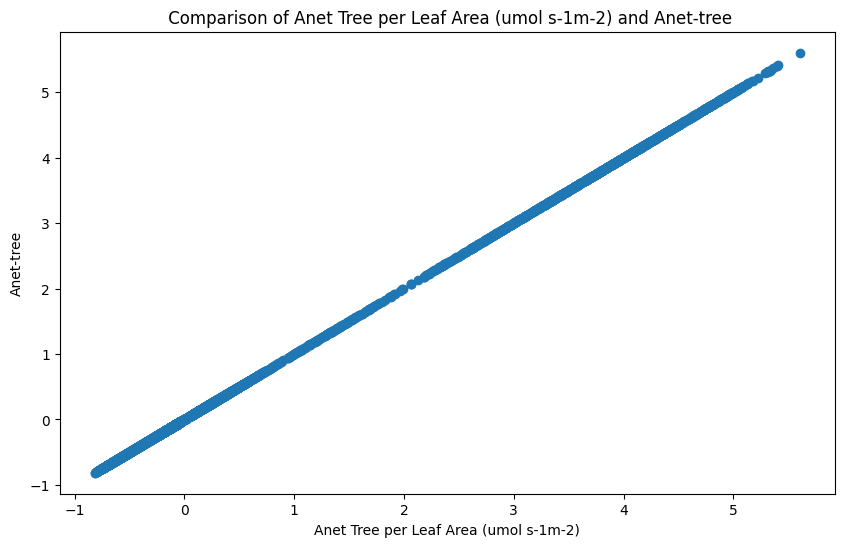

pcrit MPa


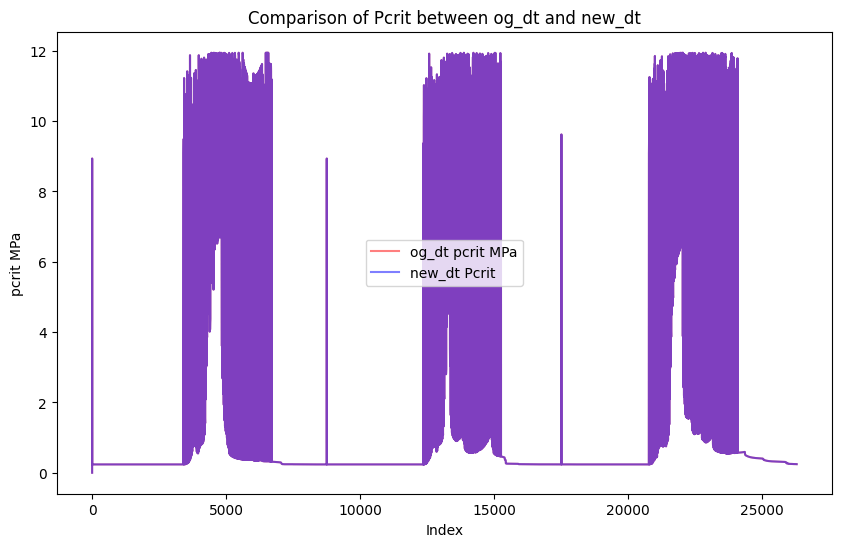

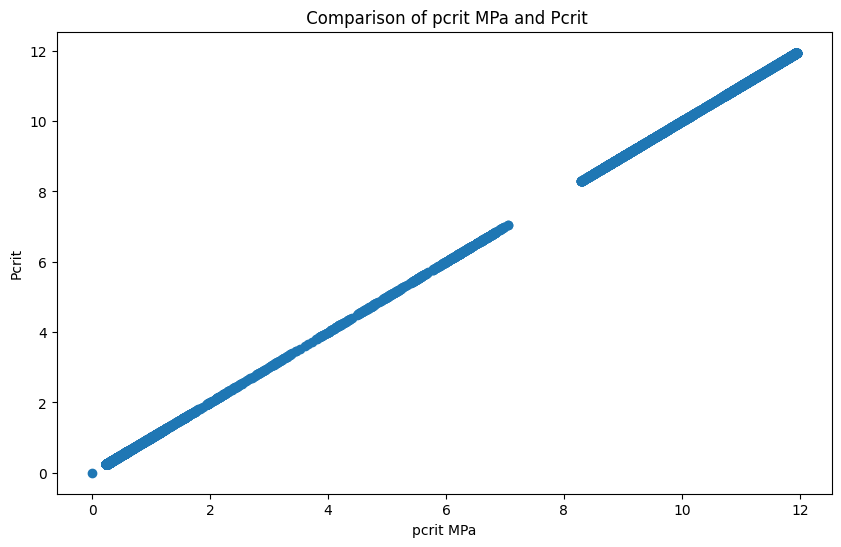

Ecrit


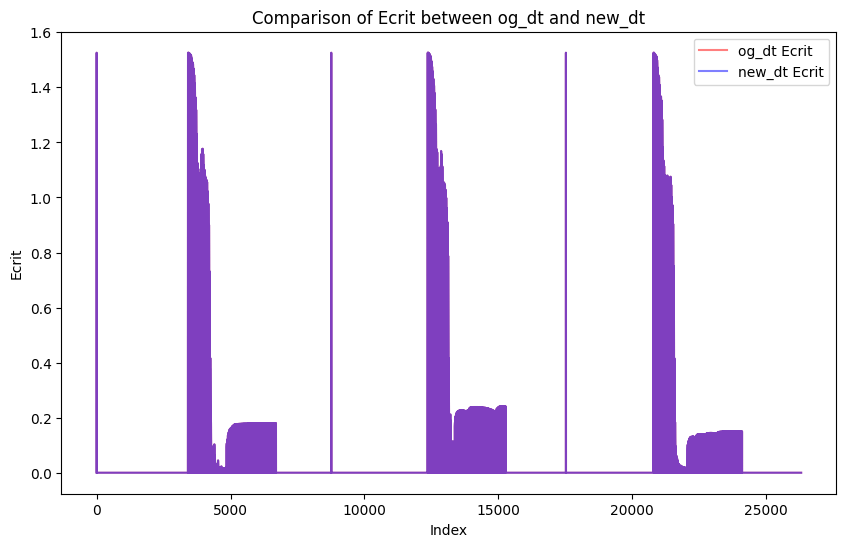

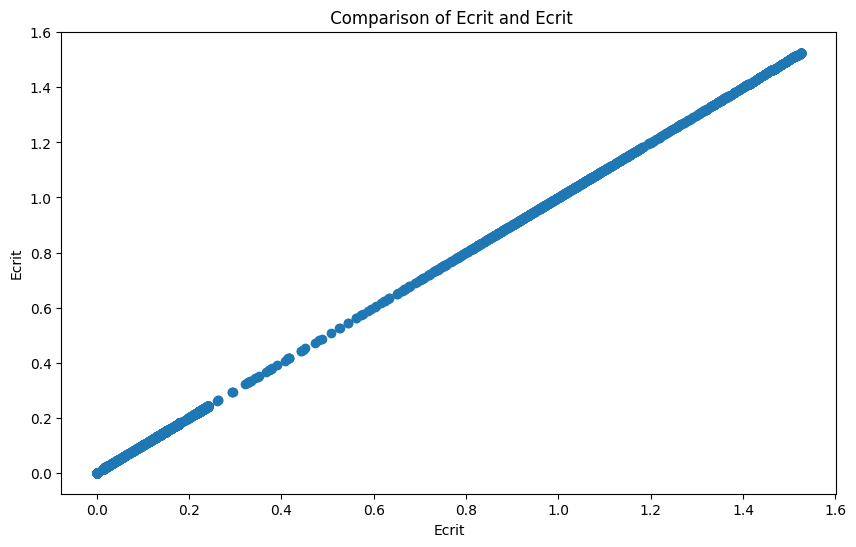

Pleaf MPa


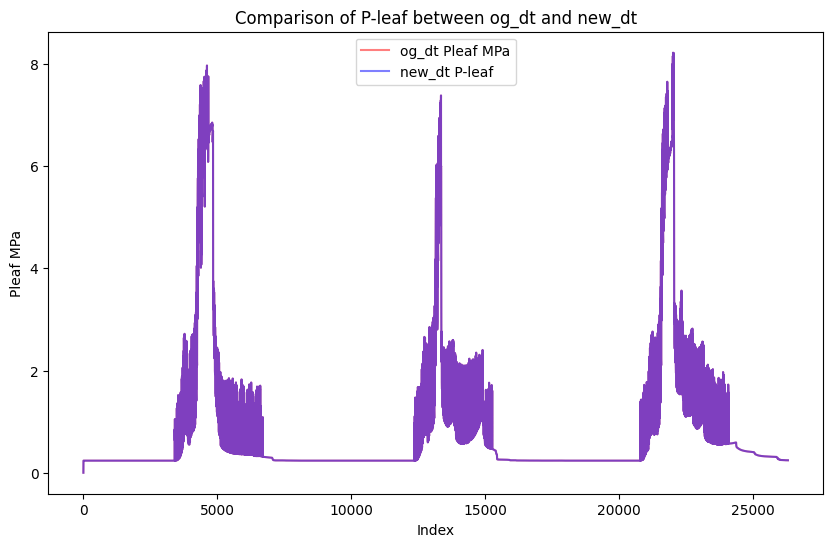

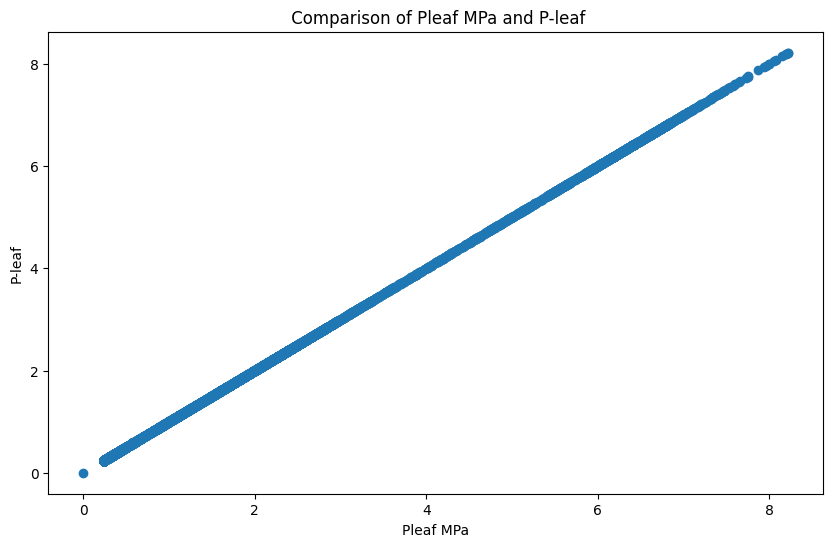

Pstem MPa


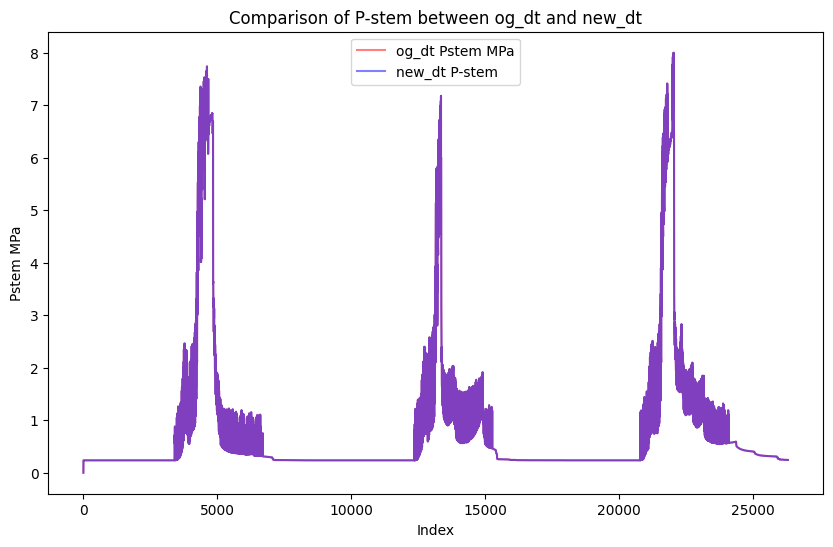

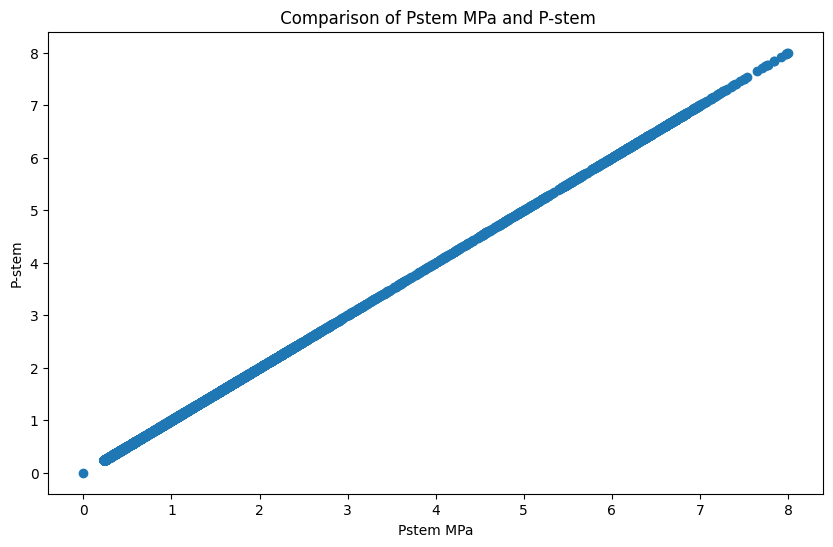

Proot MPa


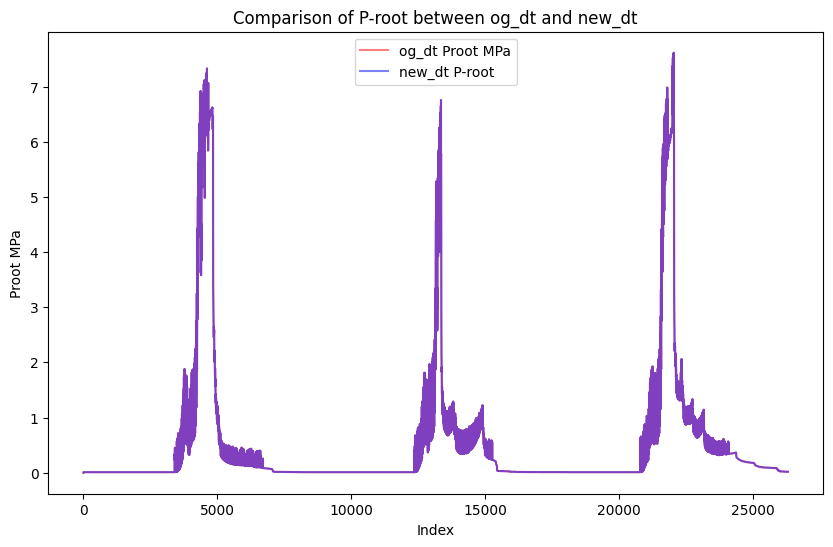

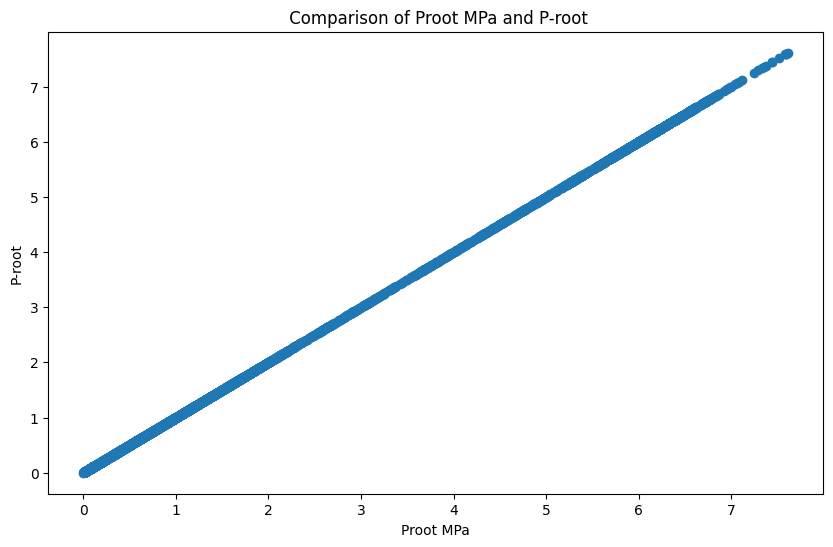

k stem kghr-1m-2


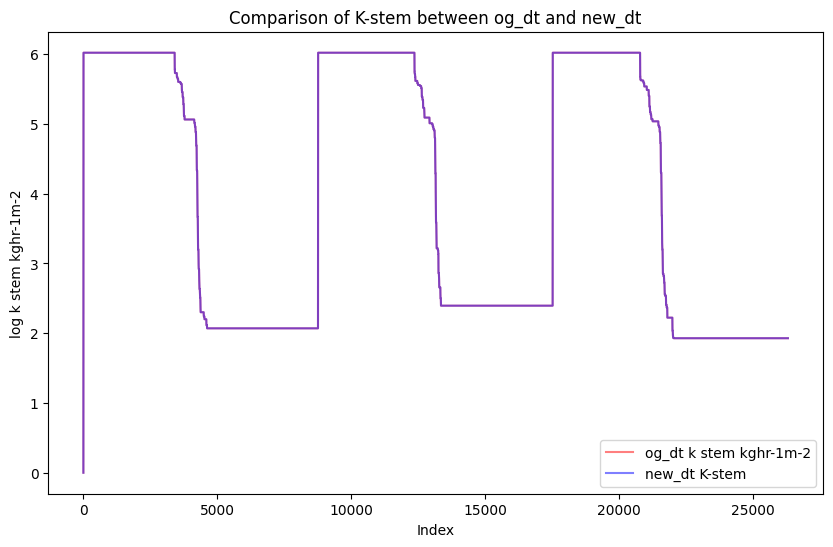

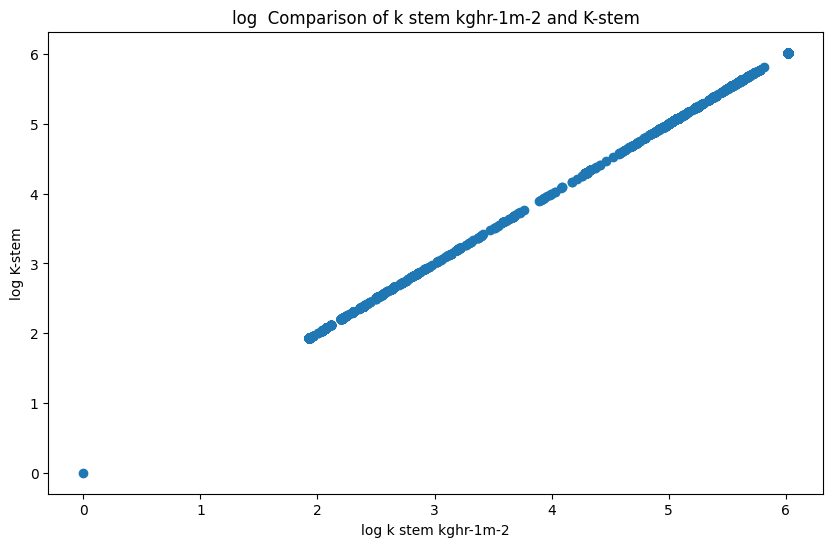

kleaf kghr-1m-2


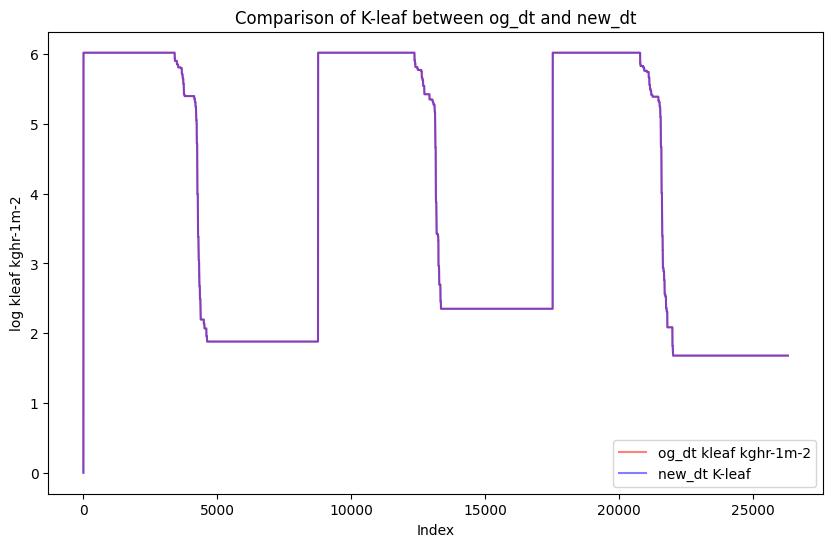

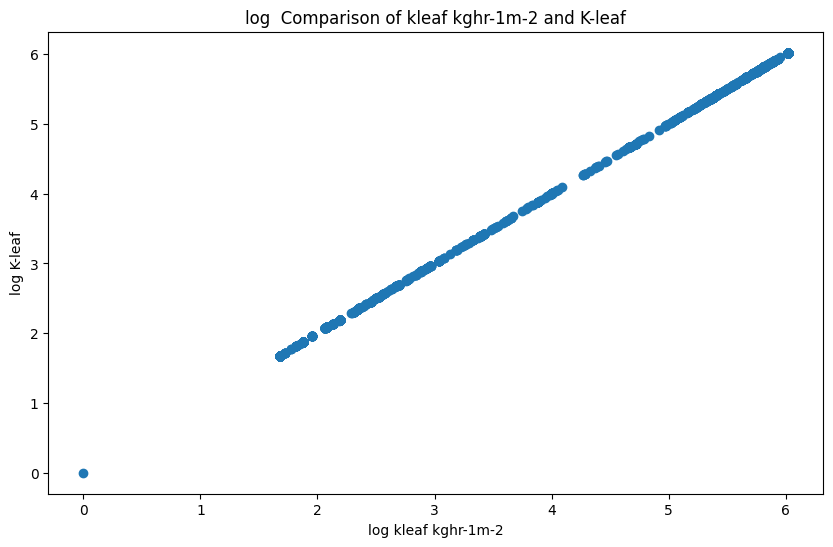

kplant kghr-1m-2


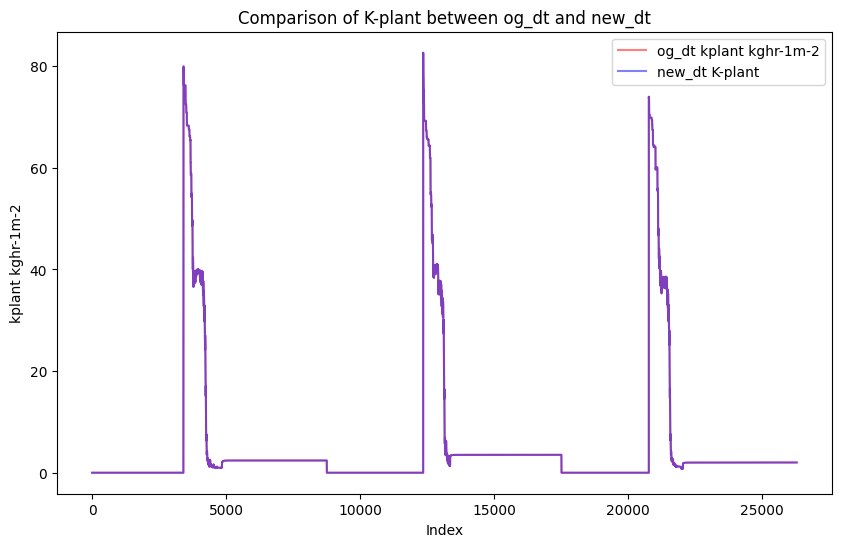

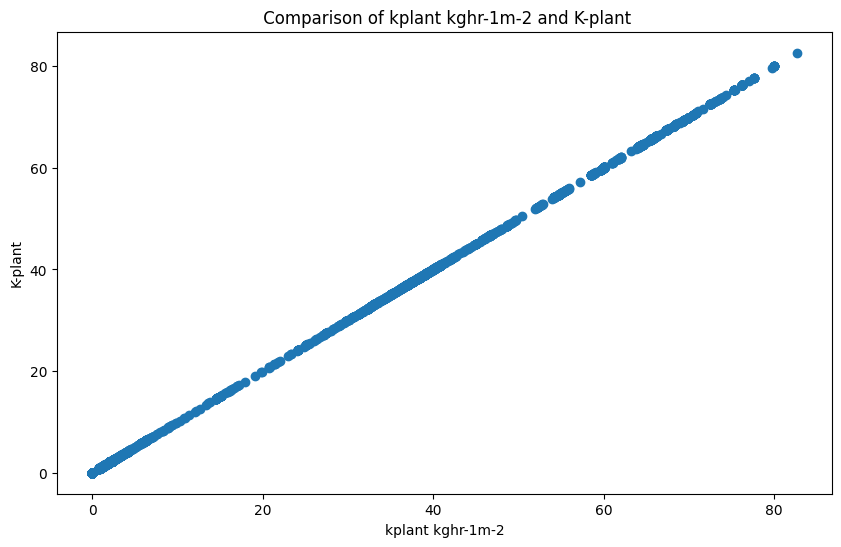

kxylem kghr-1m-2


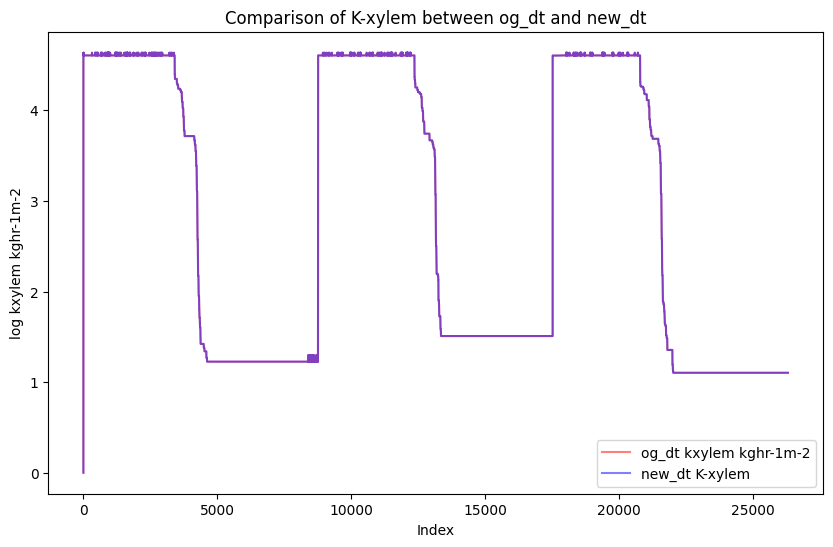

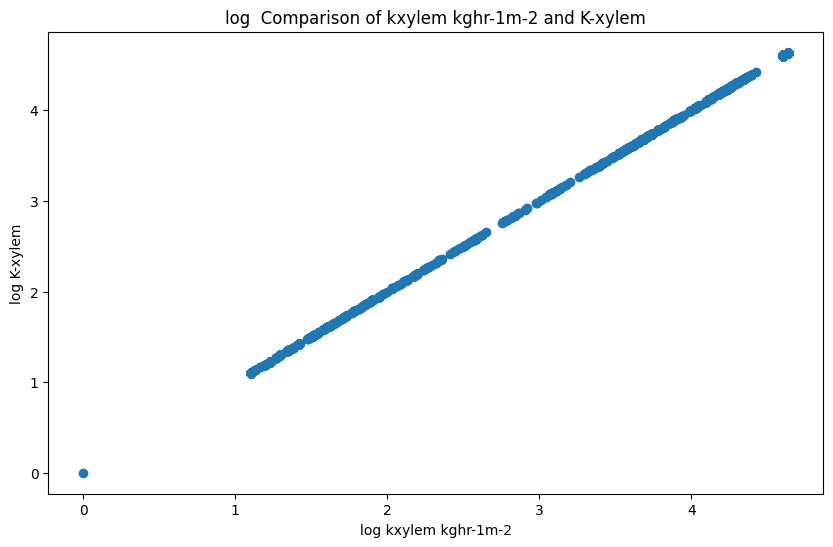

kroot 1 kghr-1m-2


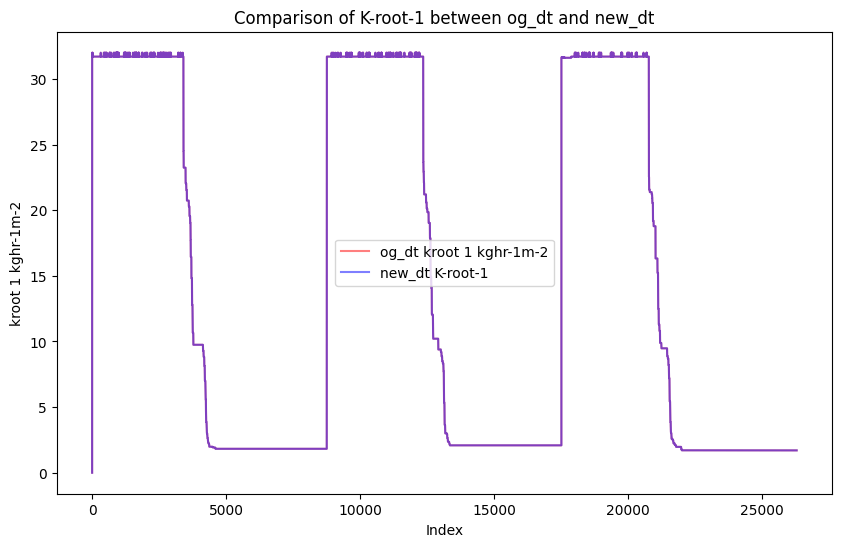

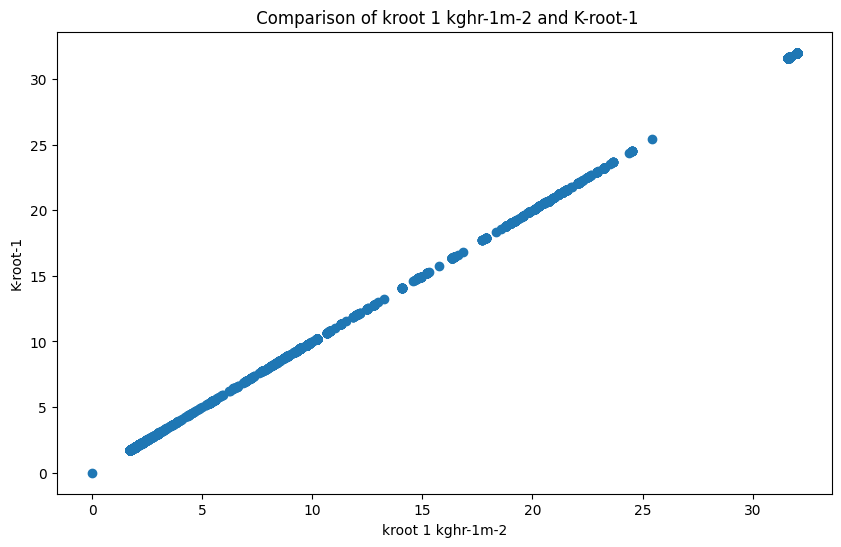

kroot 2 kghr-1m-2


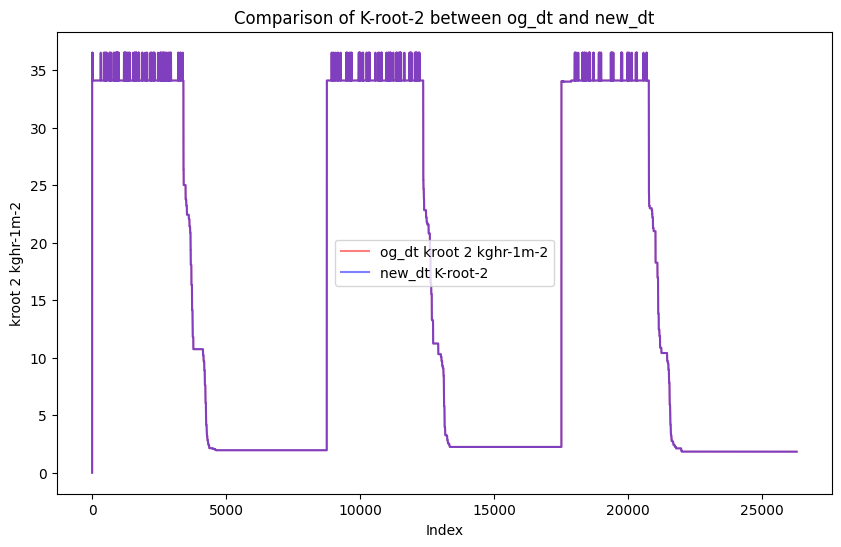

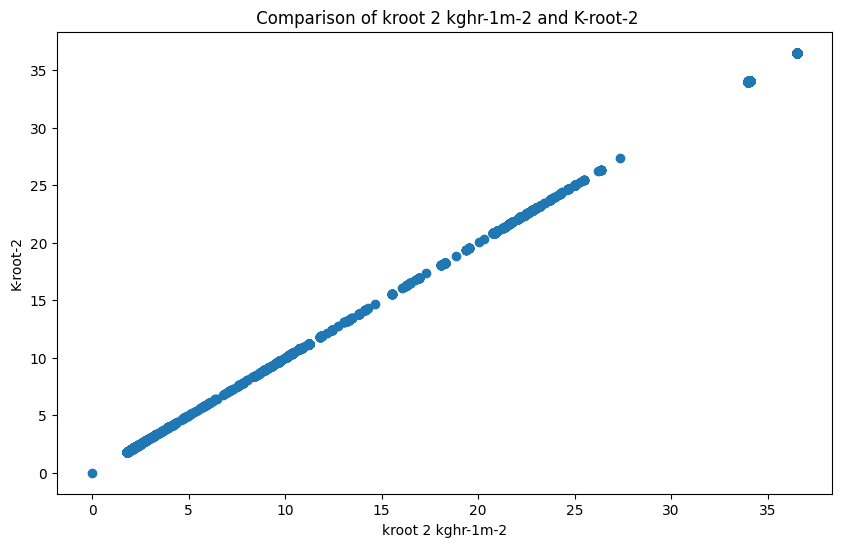

kroot 3 kghr-1m-2


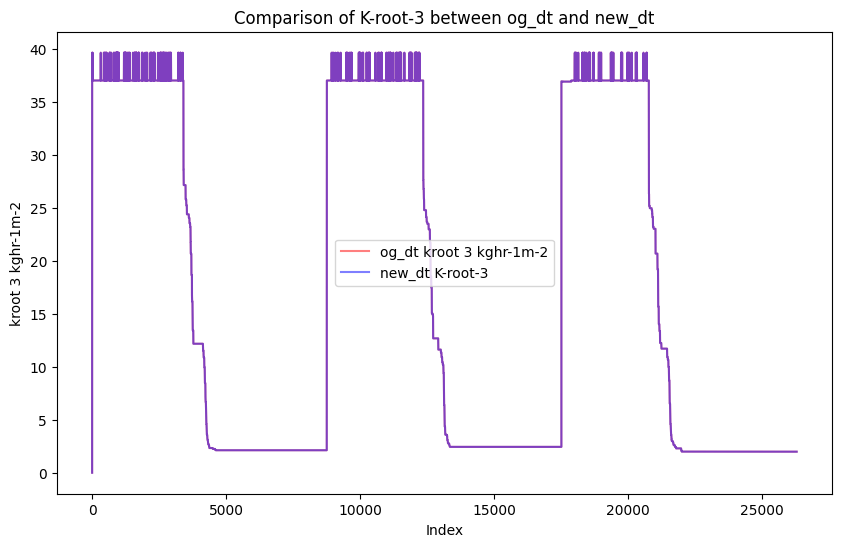

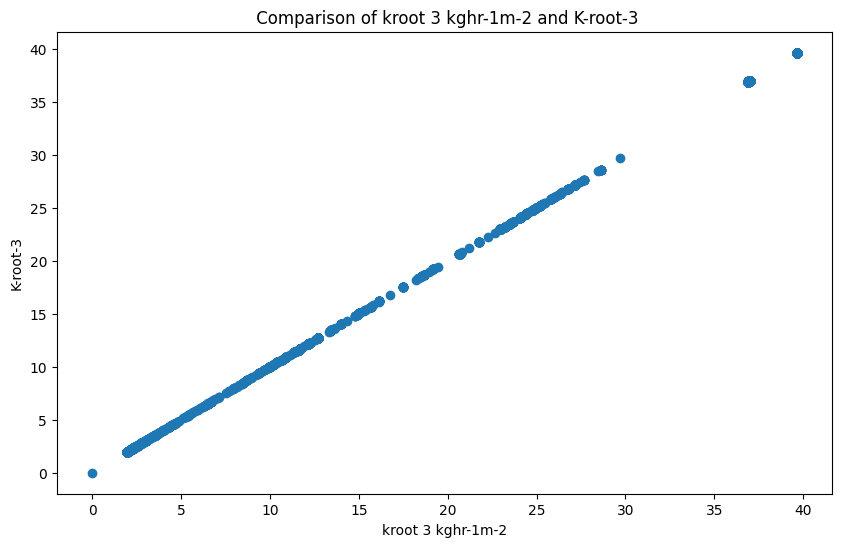

kroot 4 kghr-1m-2


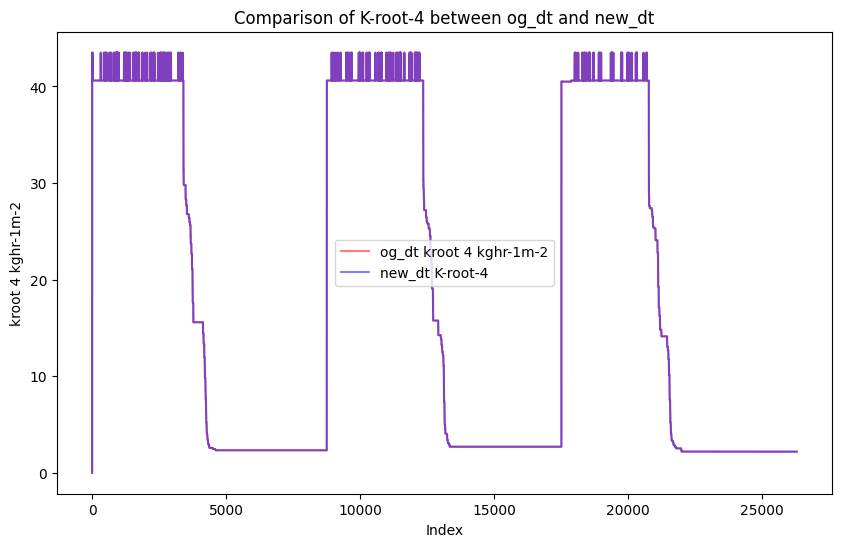

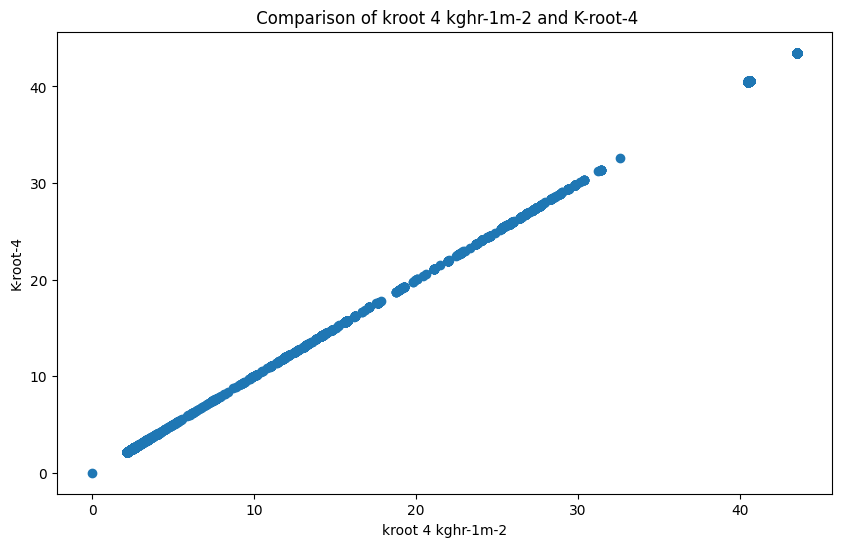

kroot 5 kghr-1m-2


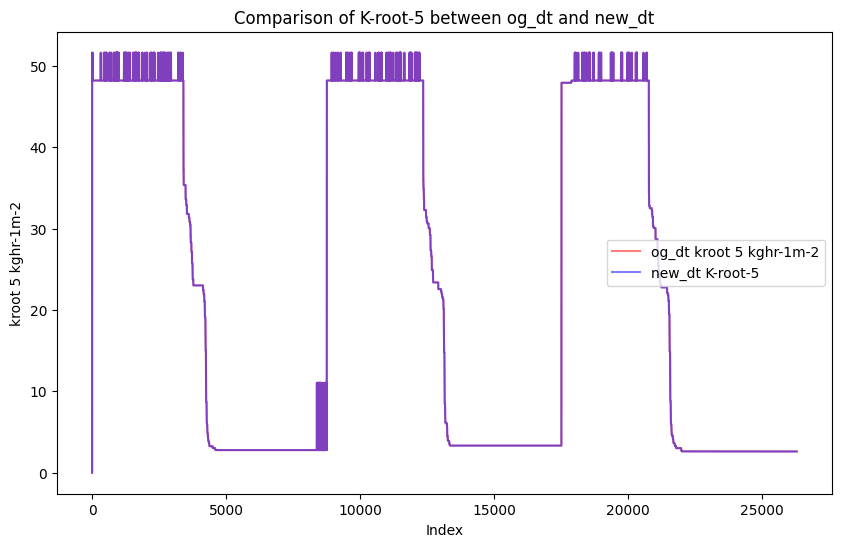

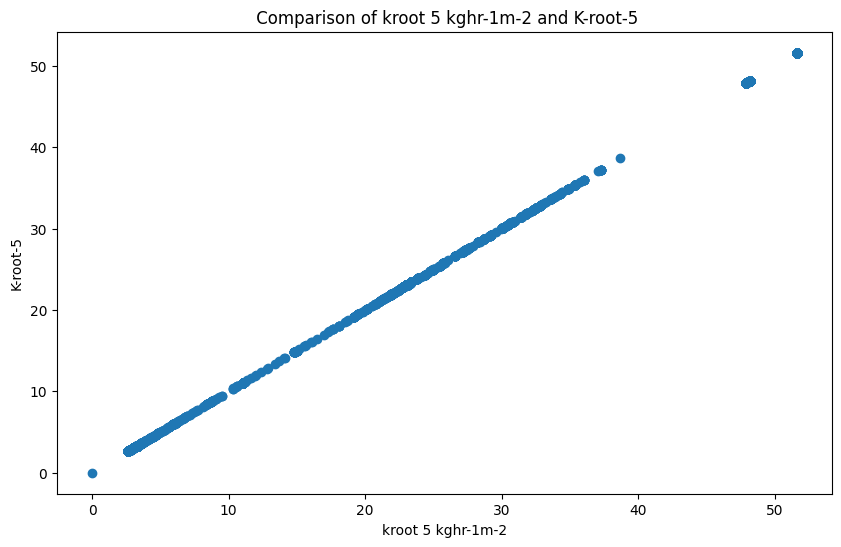

kroot all kghr-1m-2


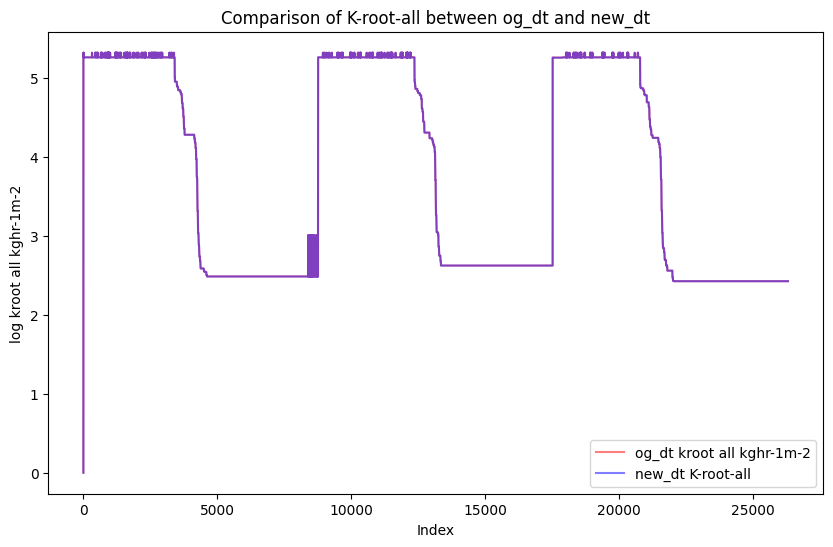

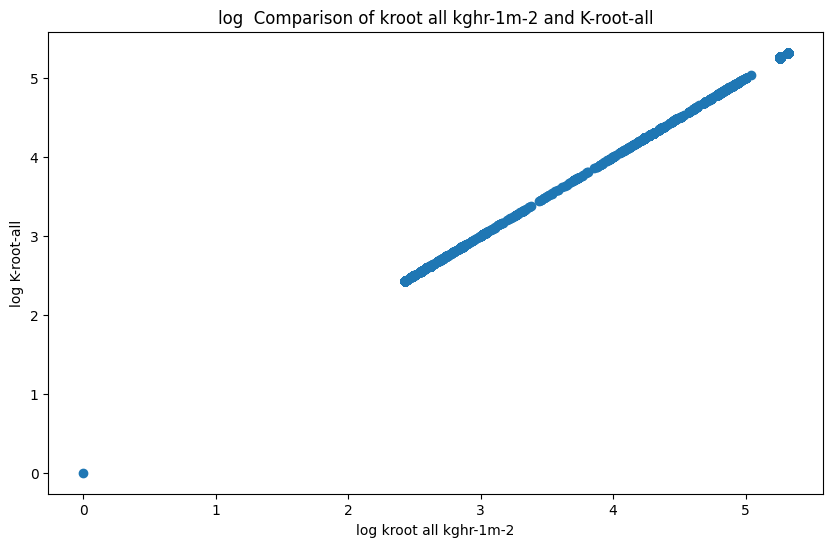

Eroot 1 (mmol s-1 m-2 leaf area)


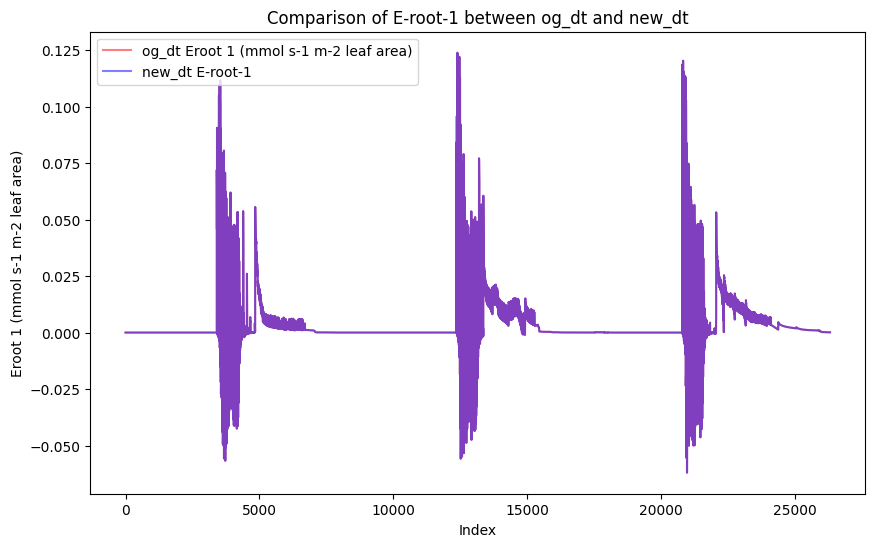

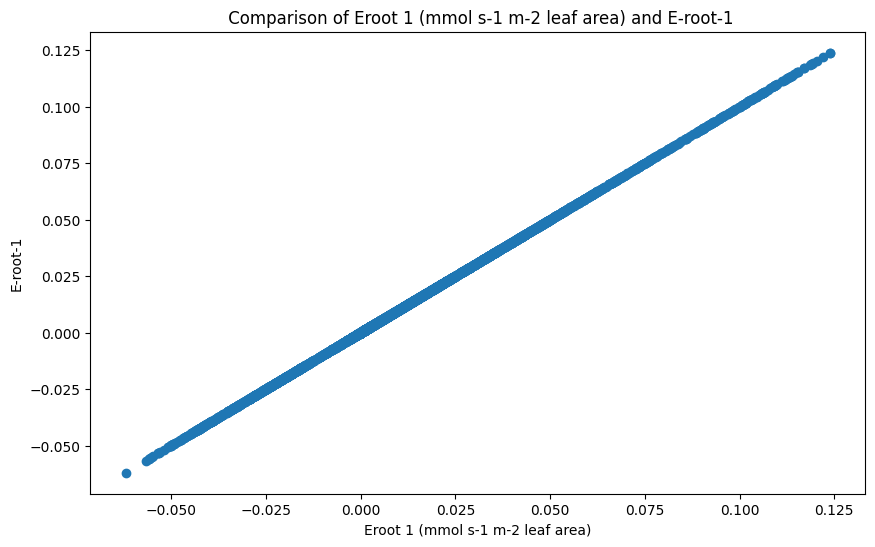

Eroot 2 (mmol s-1 m-2 leaf area)


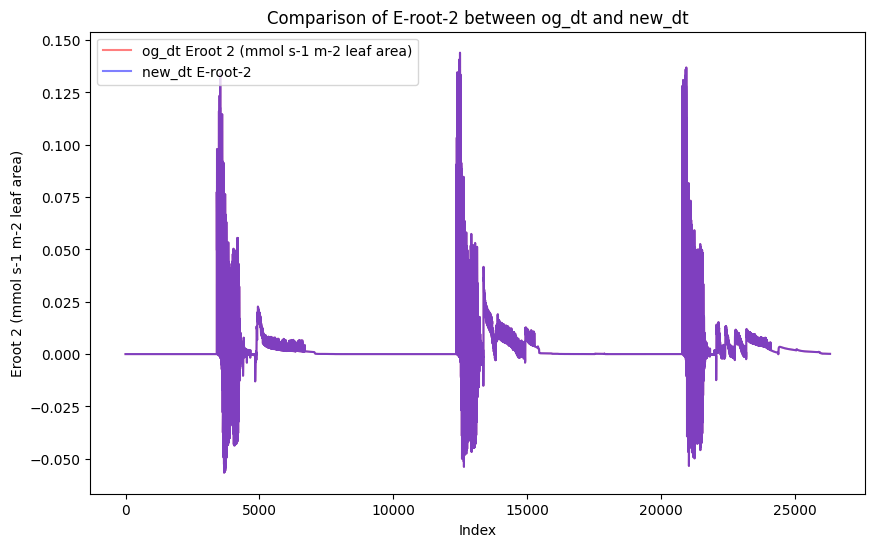

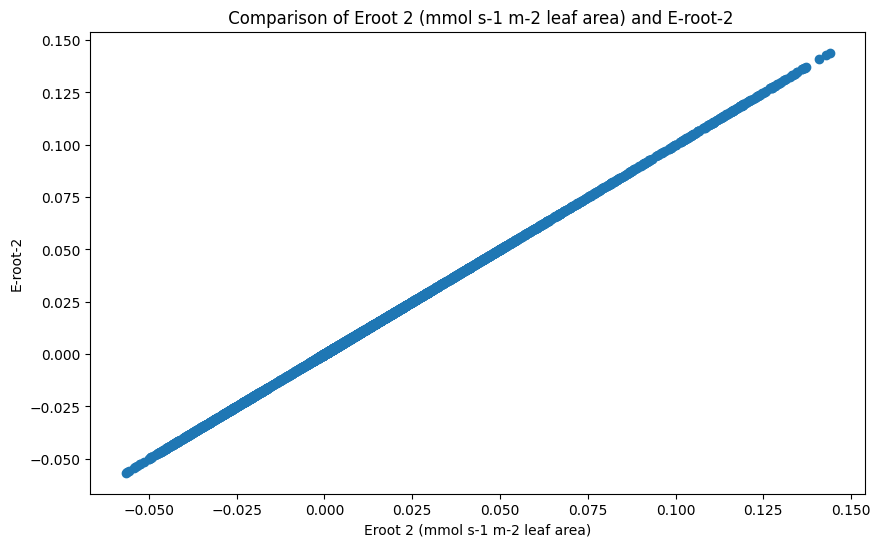

Eroot 3 (mmol s-1 m-2 leaf area)


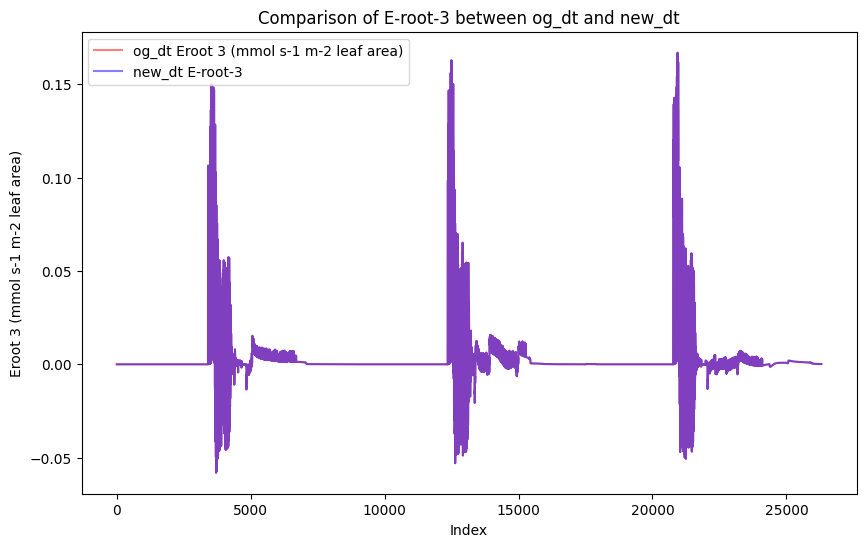

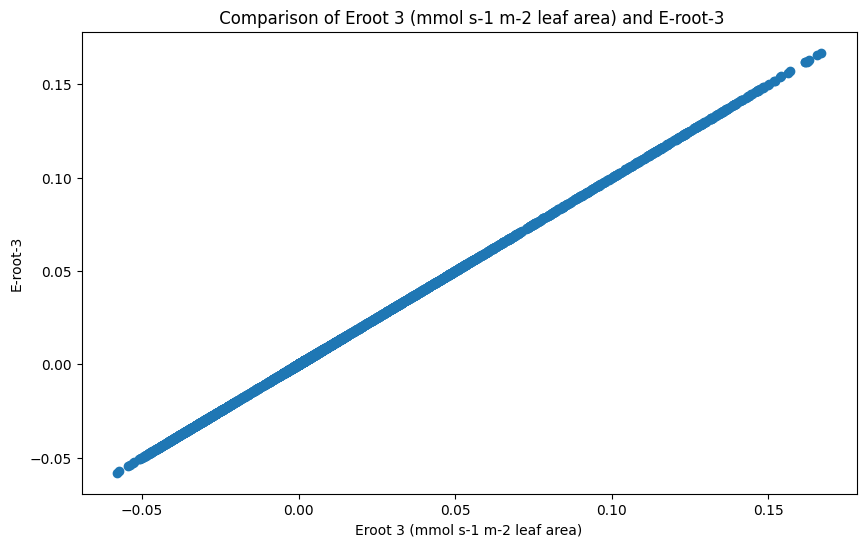

Eroot 4 (mmol s-1 m-2 leaf area)


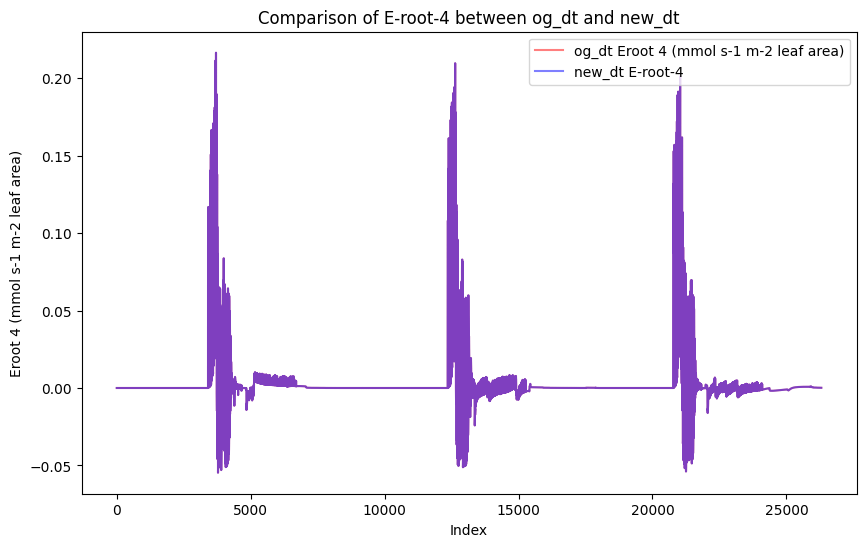

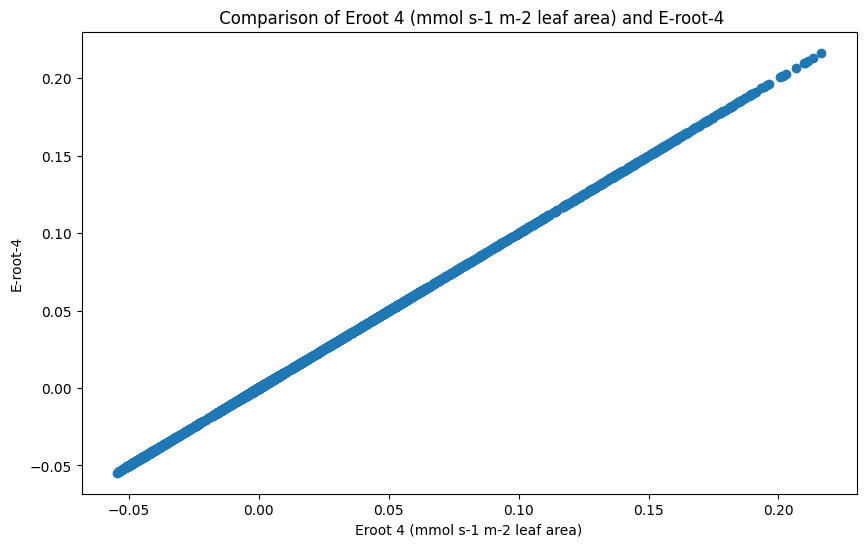

Eroot 5 (mmol s-1 m-2 leaf area)


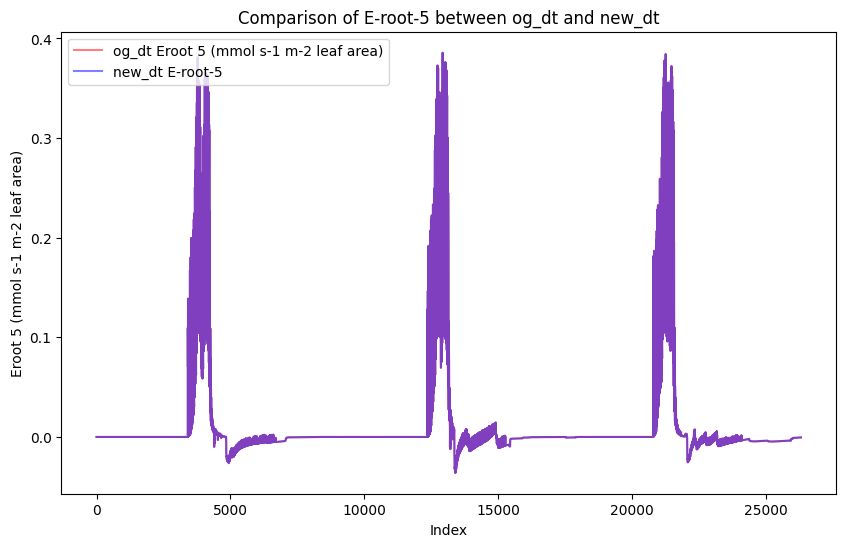

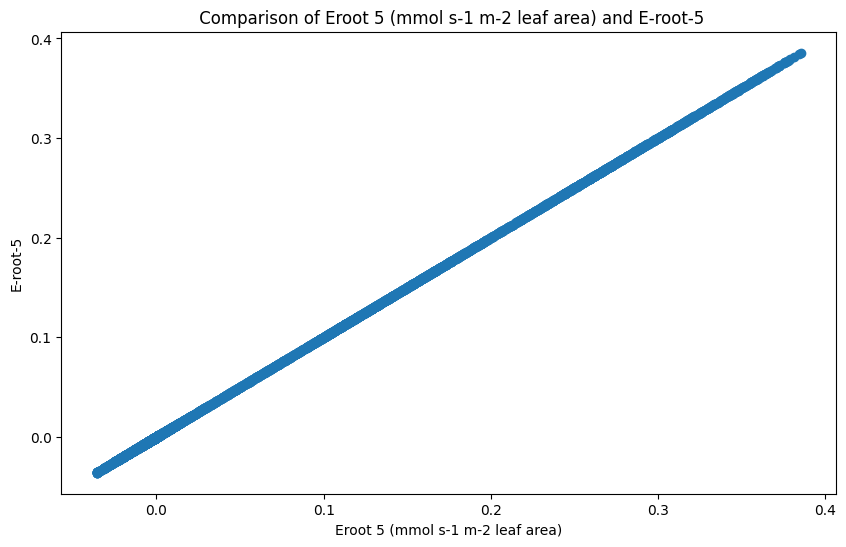

water content mm


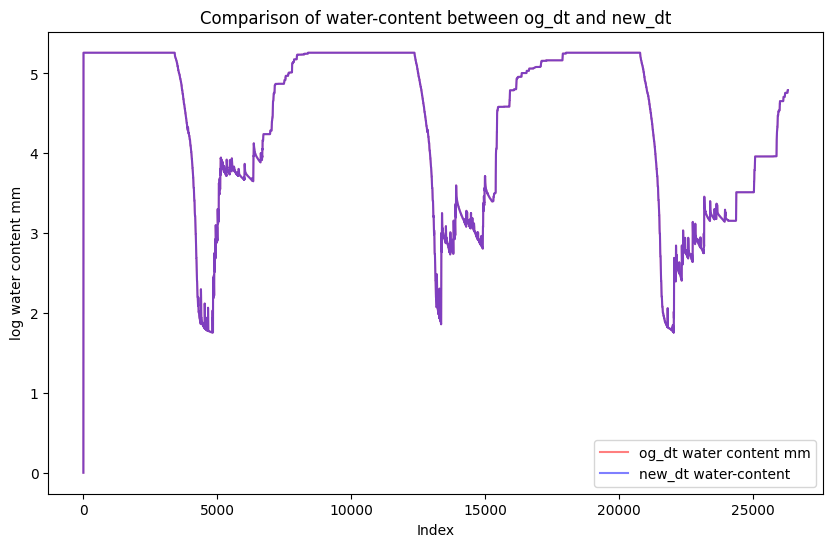

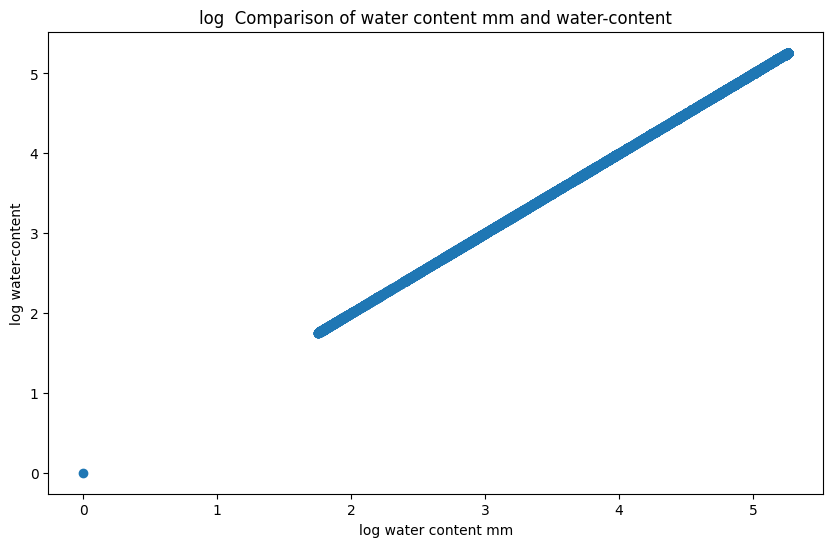

water content delta (mm timestep-1)


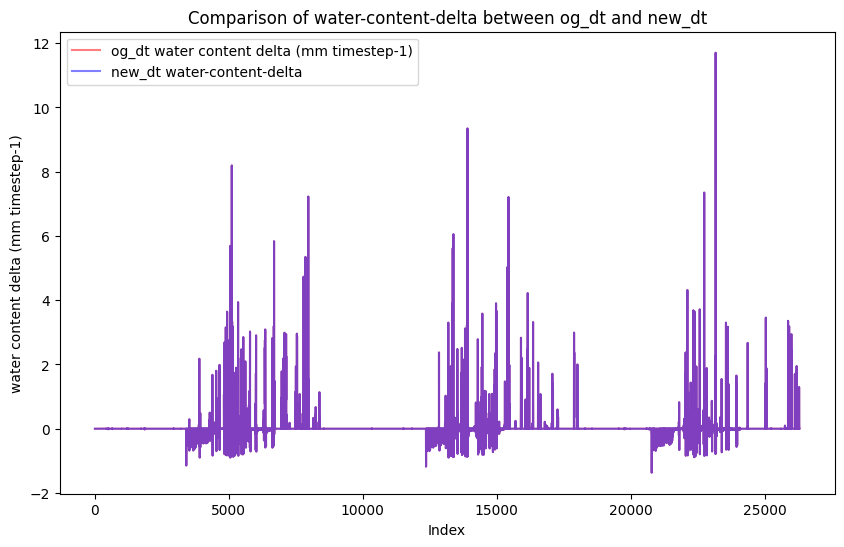

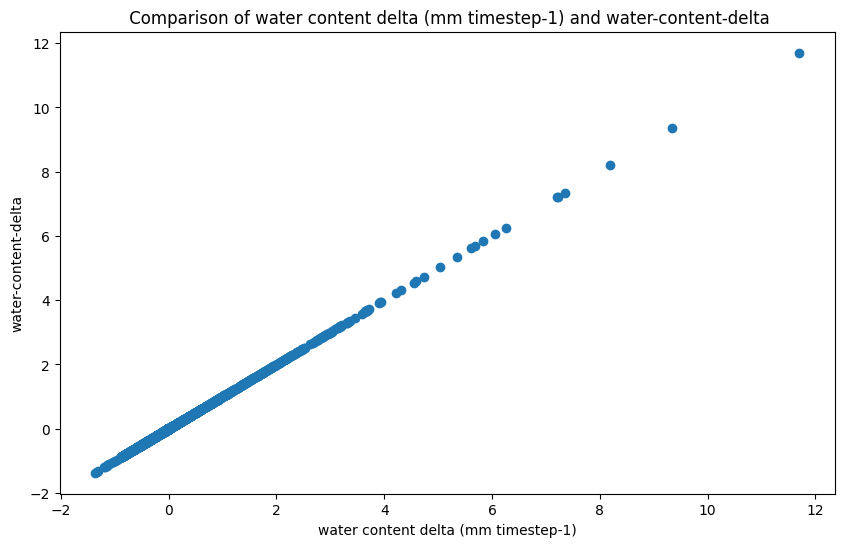

rain (mm timestep-1)


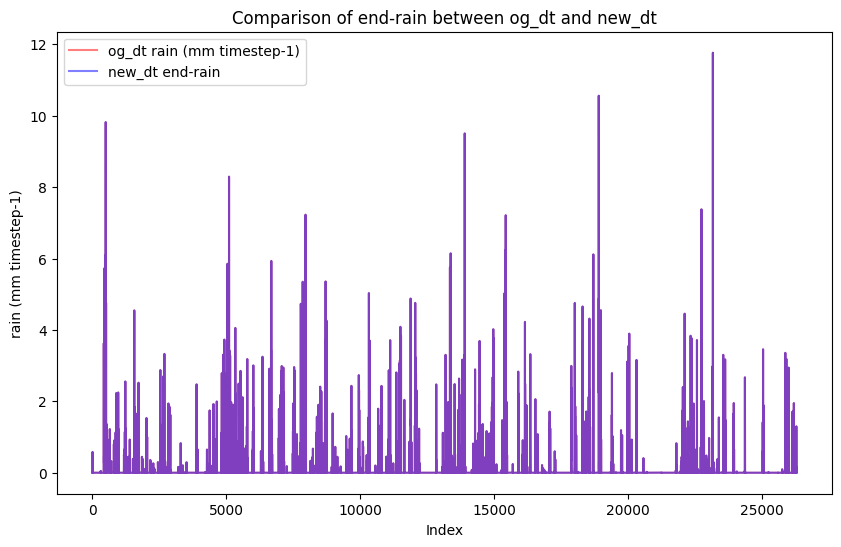

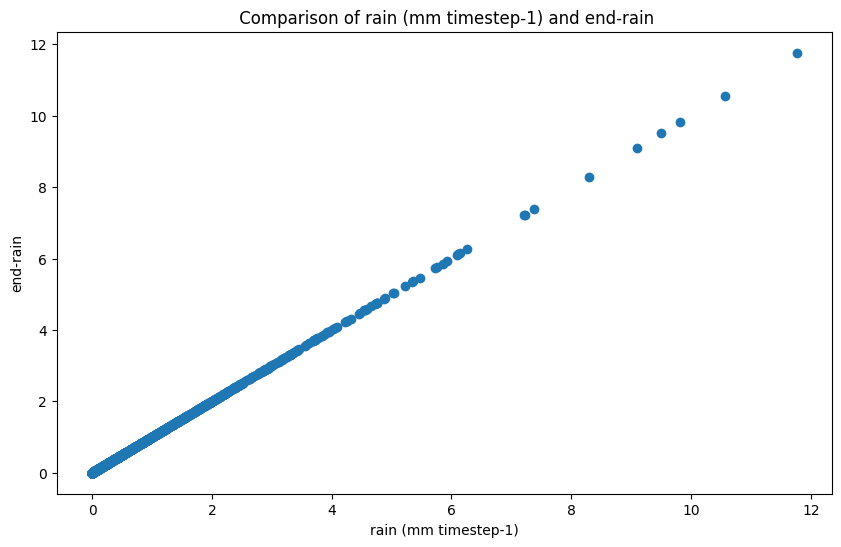

ground water input (mm timestep-1)


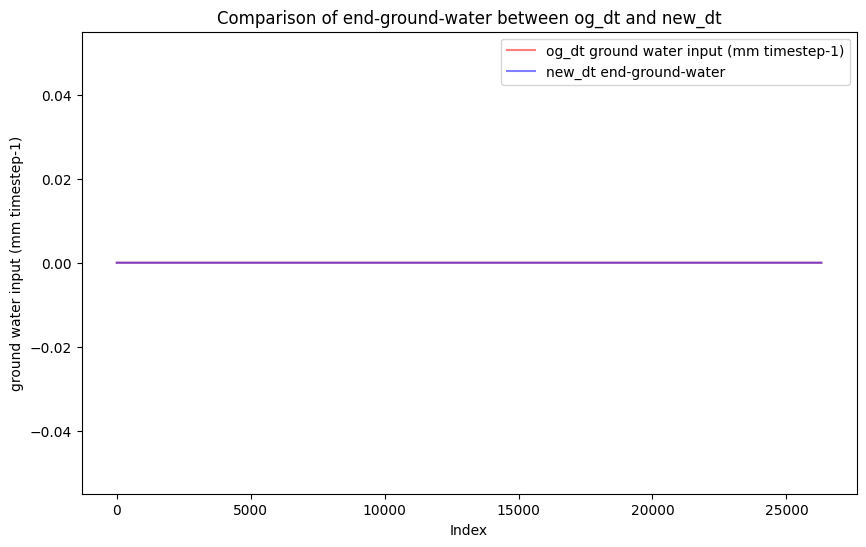

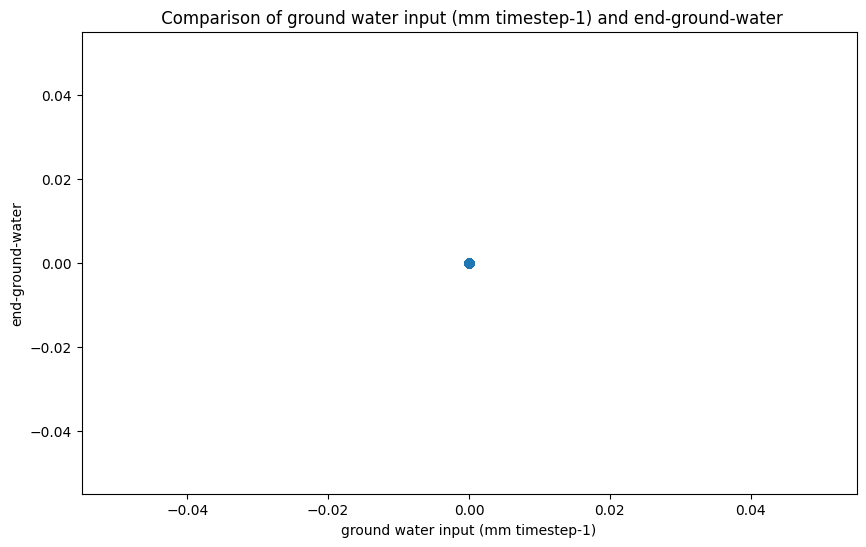

E (mm timestep-1)


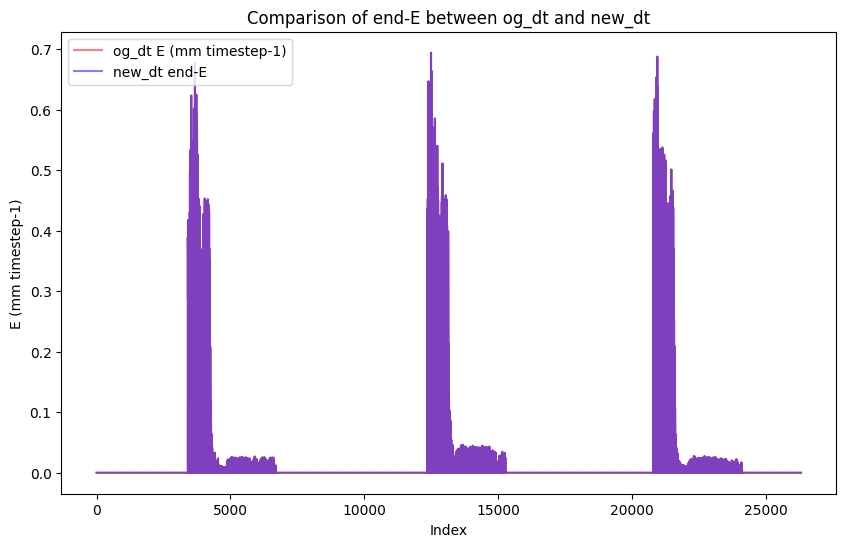

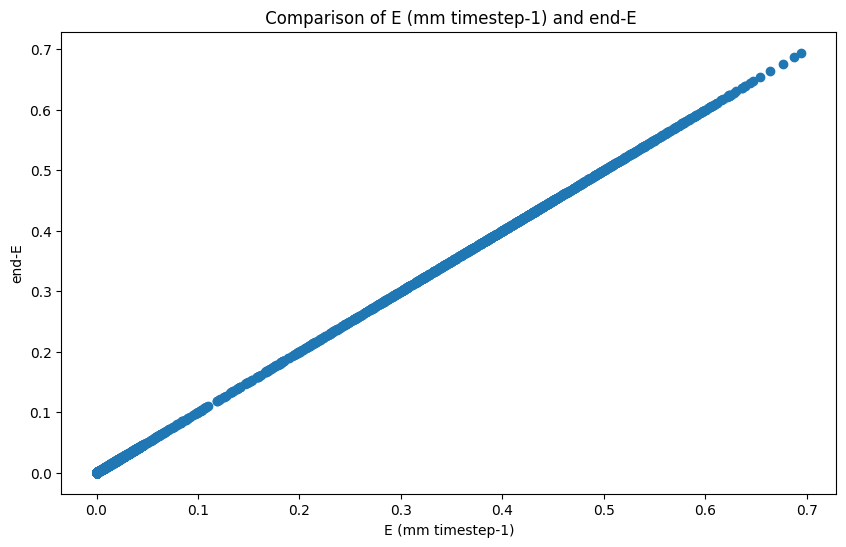

drainage (mm timestep-1)


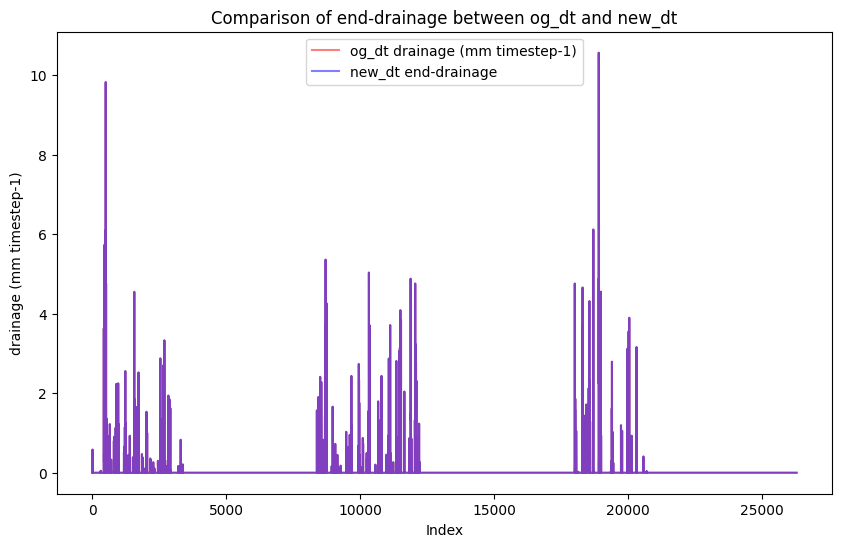

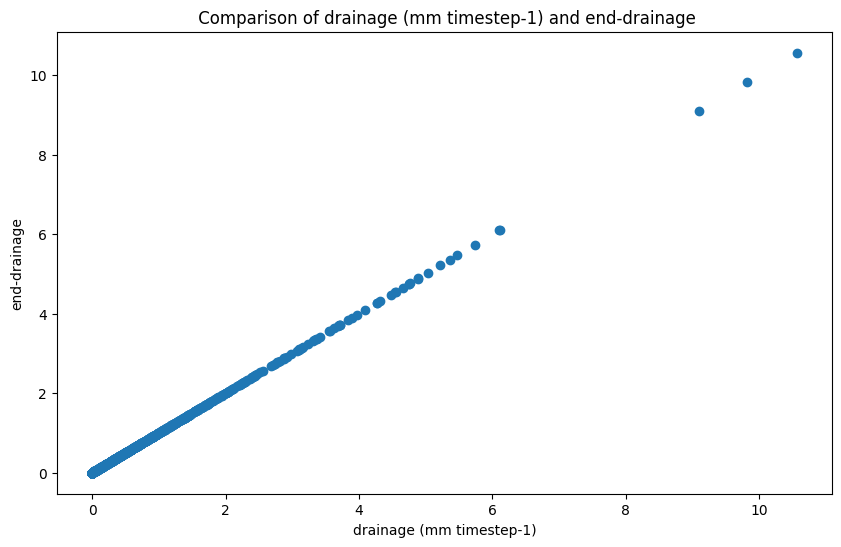

soil evap (mm timestep-1)


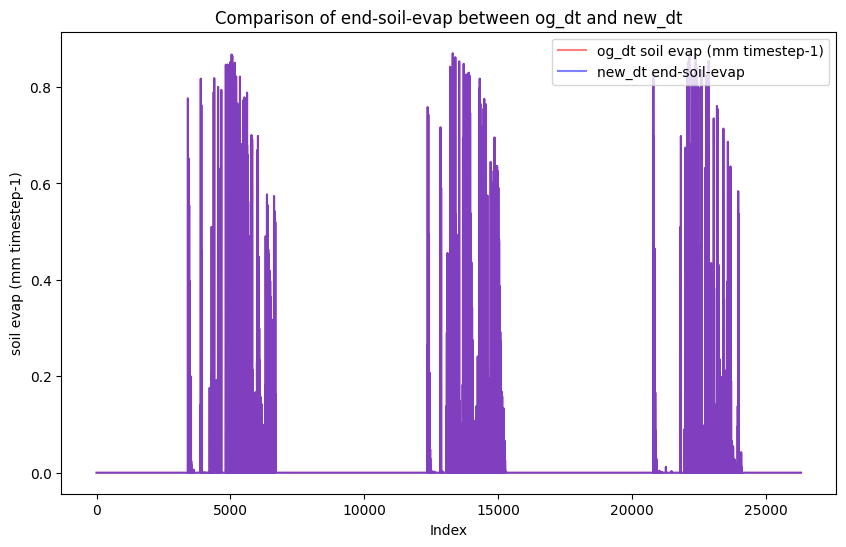

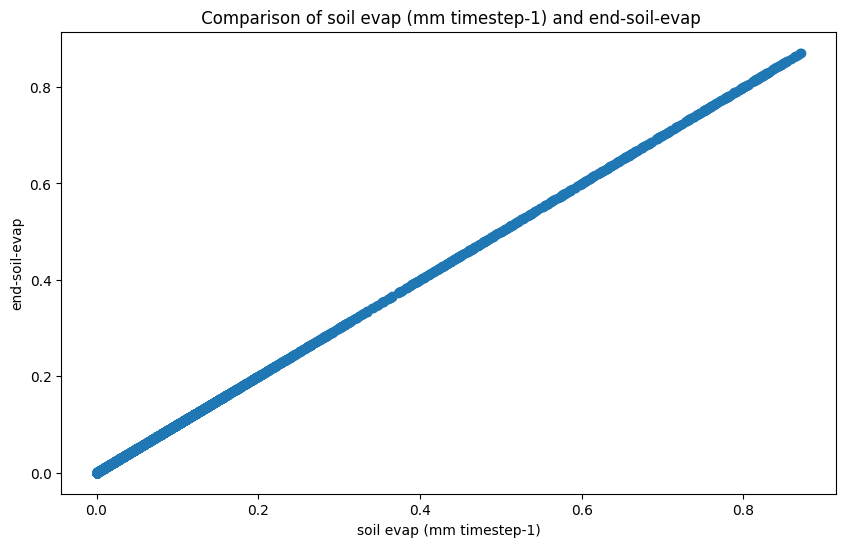

ET (mm timestep-1)


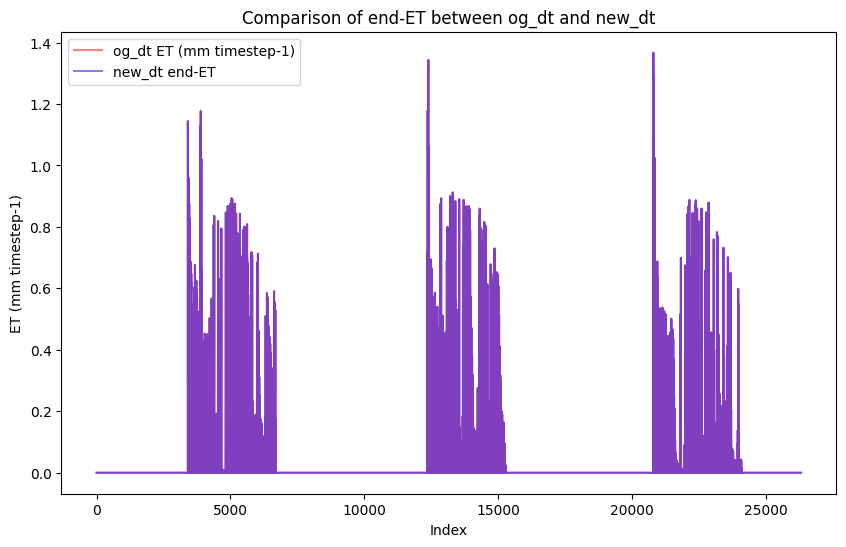

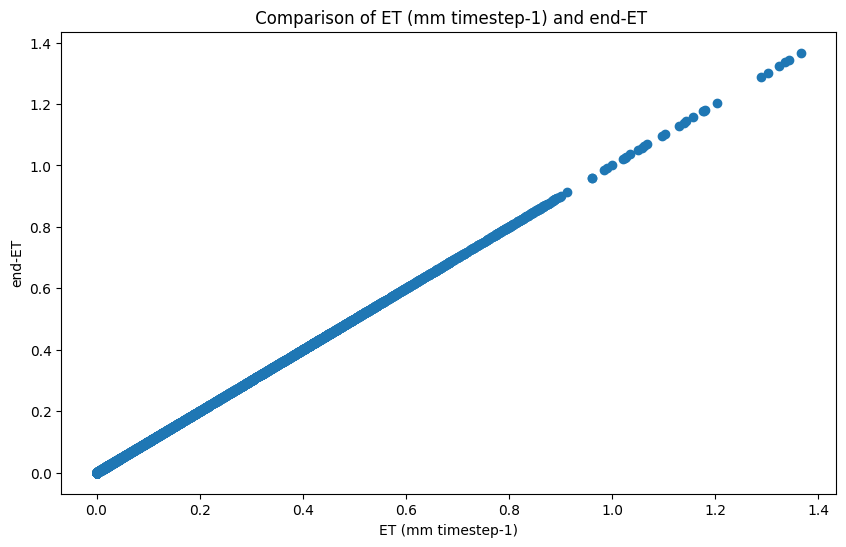

Anet per leaf area (mmol timestep-1 m-2)


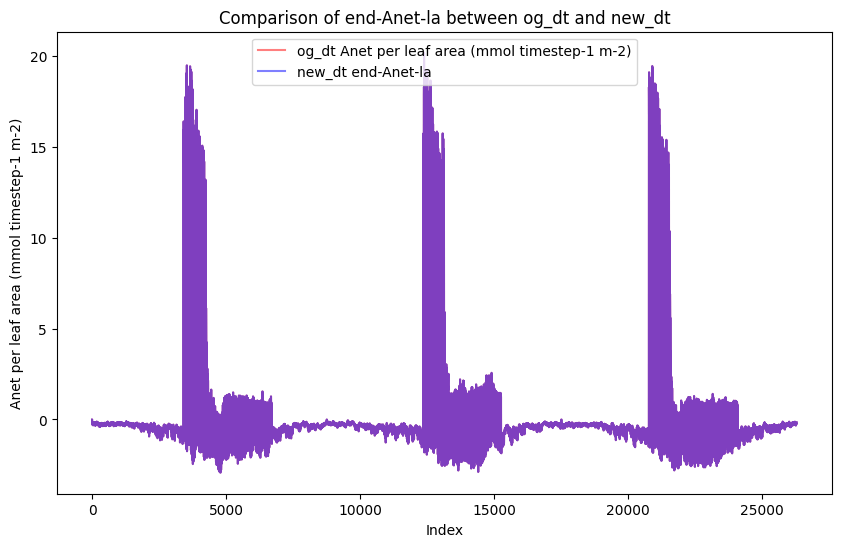

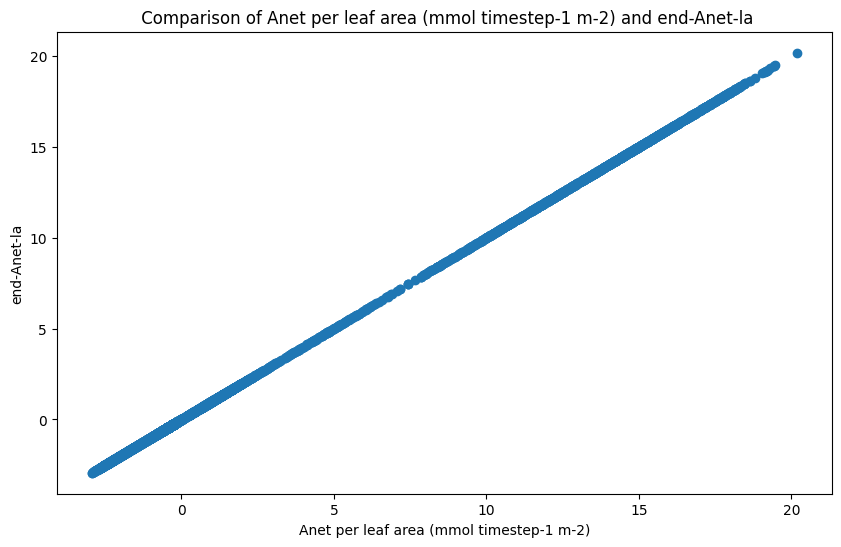

total water input (mm timestep-1)


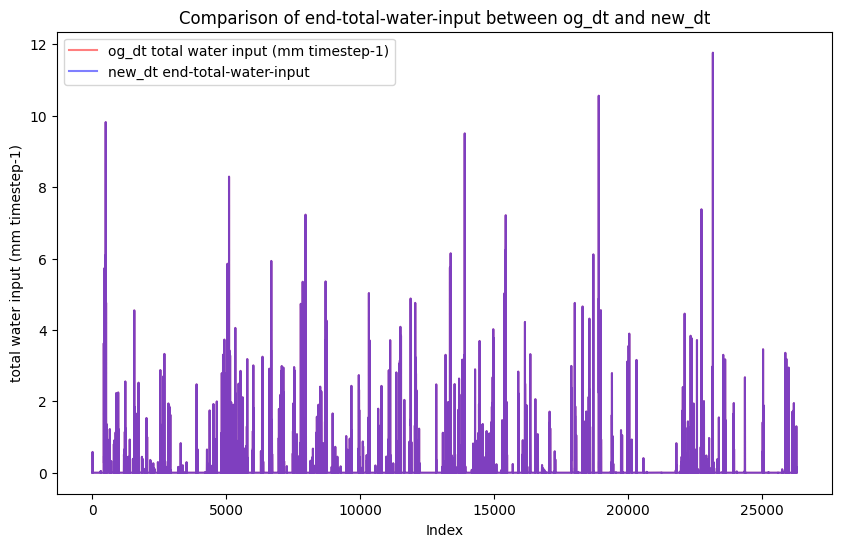

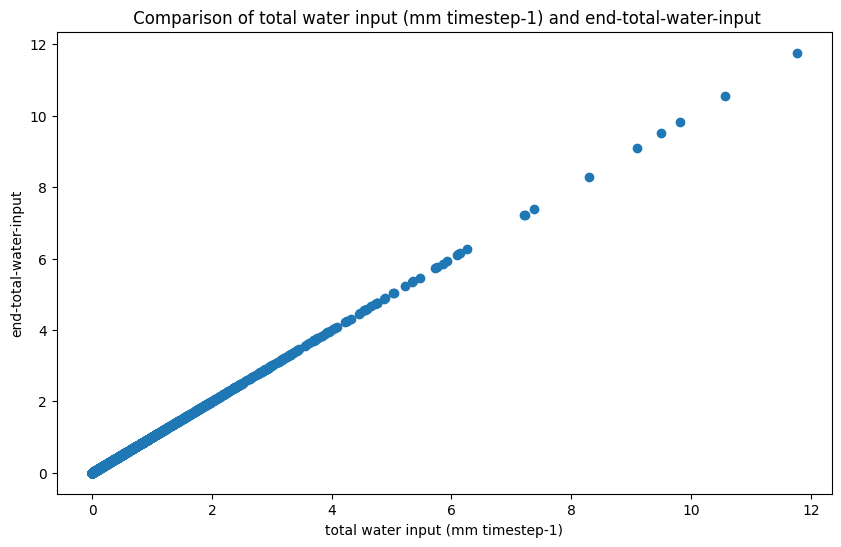

PLC plant


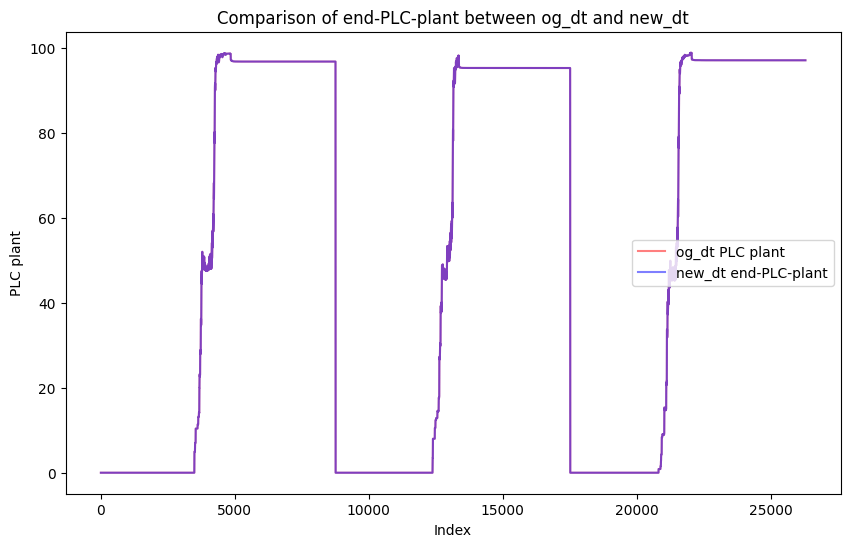

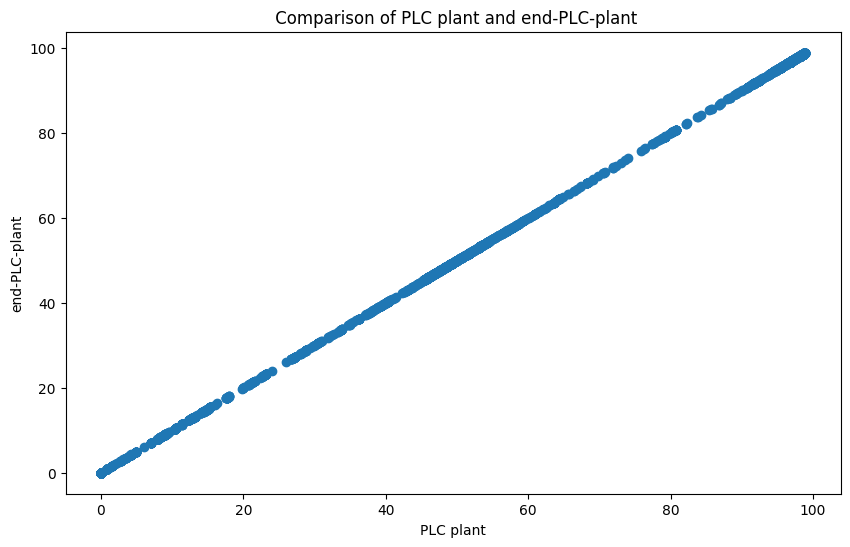

PLC xylem


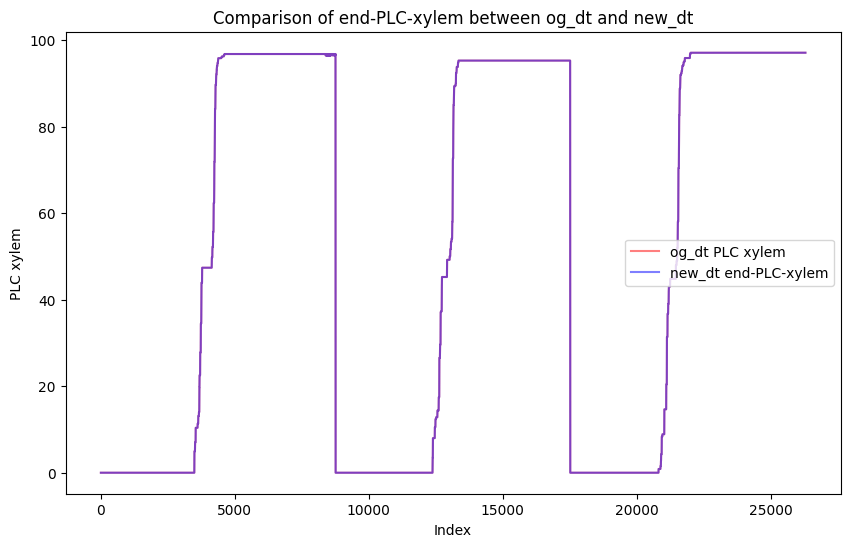

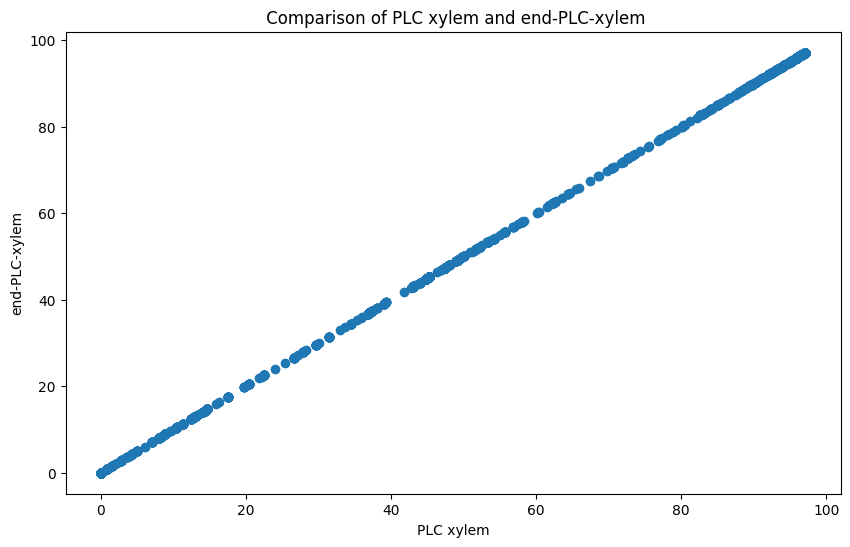

runoff (mm timestep-1)


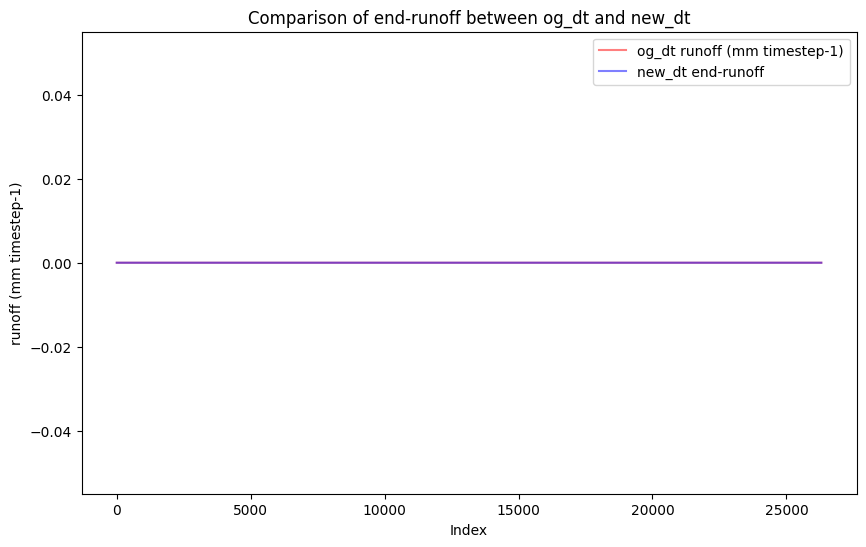

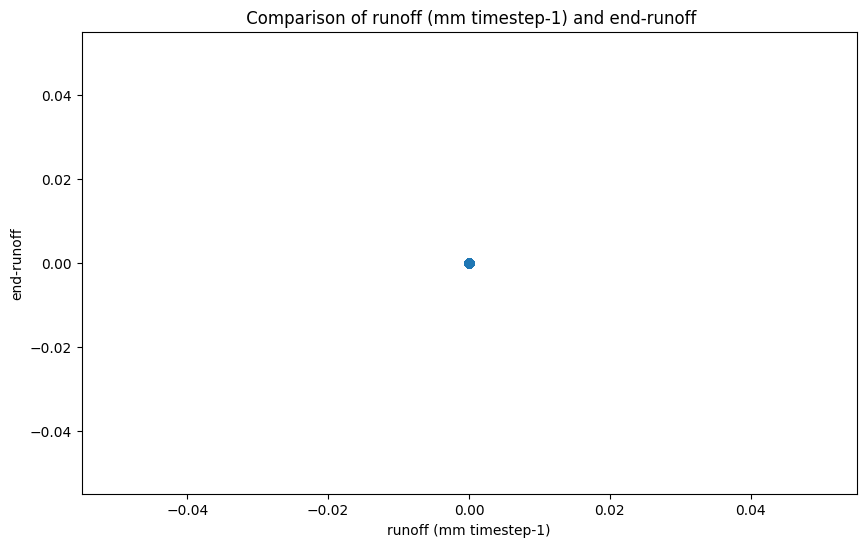

In [42]:
skip = 3
for i, old_col_name in enumerate(og_dt.columns[skip:]):
    new_col_name = new_dt.iloc[:, i+skip].name
    max_val = max(og_dt[old_col_name].max(), new_dt[new_col_name].max())
    min_val = min(og_dt[old_col_name].min(), new_dt[new_col_name].min())
    log = (max_val - min_val) > 10**2
    print(old_col_name)
    cmp_across_index(old_col_name, new_col_name, log=log)
    cmp_with_scatter(old_col_name, new_col_name, log=log)